In [40]:
from IPython.display import display, Latex
from IPython.core.display import HTML
%reset -f
%matplotlib inline
%autosave 300
from matplotlib.pylab import *

Autosaving every 300 seconds


# Motivation
L'objectif de ce cours est de fournir aux étudiants les compétences nécessaires pour aborder les concepts fondamentaux du calcul scientifique, en mettant l'accent sur les méthodes numériques et leur application à des problèmes réels.

Cette initiation n'a pas pour but de former des spécialistes de la modélisation physique et numérique de phénomènes complexes, mais plutôt d'identifier le type de problèmes qui conduit à des résolutions coûteuses sur le plan computationnel. 
- le modèle décrit par des équations aux dérivées partielles est **complexe** et évite les approches naïves d'une physique mal appréhendée au niveau discret, motivée par une approche purement algorithmique.
- Les méthodes d'approximation reposent sur des théories mathématiques solides et doivent être choisies avec soin en fonction du problème à résoudre.
- La mise en oeuvre sur machine est spécifique à ce type de problème et requiert une grande minutie. 
- les méthodes de débogage sont également spécifiques à ce type de problème et doivent être maîtrisées pour garantir la fiabilité des résultats.
- Les méthodes de vérification sont essentielles pour assurer la validité des solutions obtenues.

Nous ne verrons qu'un nombre réduit de méthodes numériques pour quelques problèmes spécifiques. Les problèmes numériques résolues peuvent vite trouver des limitations en temps calcul et motive des problèmes purement informatique comme le recours au calcul parallèle qui sera abordé en Master 2. Un informaticien qui doit penser le portage d'un code de résolution d'équations aux dérivées vers une structure de code parallèle doit être initié à la problèmatique des méthodes numériques pour les équations aux dérivées partielles. 

Deux outils mathématiques seront abordés dans ce cours et pourront servir dans d'autres contextes:
- l'approximation des dérivées
- la transformée de Fourier discrète.

## Exemples de calculs numériques

![Calcul Ansys (fluent) méca flu](images/ansys.png)

![Ingénierie de la performance](images/motorsportengineer.jpg)

![Etude conseil](images/EC2_1.png)

![Etude conseil](images/EC2_2.png)

# Equations différentielles linéaires

## Introduction
Les équations différentielles jouent un rôle central pour décrire des phénomènes physiques.
Initié par Newton (1642-1727), c'est le début de la physique moderne et l'utilisation de l'analyse pour résoudre la loi de la gravitation universelle. Les méthodes permettant la résolution des équations linéaires ont ensuite été développées au début du 18ème siècle (Euler (1707-1783) et Lagrange (1736-1813)).

La mécanique du point permet d'appréhender les mouvements des corps en fonction des forces qui leur sont appliquées. Les équations différentielles linéaires sont utilisées pour décrire ces mouvements. En effet, l'éccélération d'un corps est proportionnelle à la force qui lui est appliquée et l'accélération est la dérivée de la vitesse par rapport au temps. La vitesse est la dérivée de la position par rapport au temps. Ainsi, on obtient une équation différentielle linéaire du second ordre.
$$
\vec{F}(t) = m \vec{a} = m \frac{d^2 \vec{x}(t)}{dt^2}=m \vec{x}''(t),
$$
où $\vec{F}(t)$ est la force appliquée, $m$ la masse du corps, $\vec{a}$ l'accélération, $\vec{x}(t)$ la position du corps.

Dans le cas où la force contient une force de frottement proportionnelle à la vitesse, on obtient une équation différentielle linéaire:
$$
\vec{F}(t)-\gamma \vec{x}'(t) =m \vec{x}''(t).
$$
Si on rajoute une force de rappel élastique (on pense à un ressort attaché à la masse), on obtient une équation différentielle linéaire du second ordre:
$$
\vec{F}(t)-\gamma \vec{x}'(t)-k \vec{x}(t) =m \vec{x}''(t).
$$
Lorsque les forces dépendent non-linéairement de la position ou de la vitesse, on obtient des équations différentielles non-linéaires. Ces équations sont plus difficiles à résoudre et nécessitent souvent des méthodes numériques. L'existence même des solutions n'est pas garantie et l'intervalle de temps sur lequel la solution est valide peut être très court. C'est un sujet que nous n'aborderons pas ici. Nous nous consacrerons aux équations différentielles linéaires.

## Equations différentielles linéaires du premier ordre

### Définition
Une équation différentielle linéaire scalaire du premier ordre est une équation de la forme:
$$
x'(t)=P(t)x(t)+Q(t),   
$$
où $P(t)$ et $Q(t)$ sont des fonctions continues sur un intervalle $I$ de $\mathbb{R}$.
### Solutions
Si $Q=0$, l'ensemble des solutions de cette équation est donné par:
$$
x(t)=x(t_0)e^{\int_{t_0}^t P(s)ds},
$$
où $t_0$ et $x(t_0)$ peuvent être choisis arbitrairement. Si on connaît la solution $x(t_0)$ à un instant donné $t_0$, la solution à tout instant $t$ est donnée par l'expression ci-dessus et est unique.

Dans le cas général $Q\neq0$, l'ensemble des solutions est donné par la forule de Duhamel:
$$
x(t)=x(t_0)e^{\int_{t_0}^t P(s)ds}+\int_{t_0}^t e^{\int_{s}^t P(u)du}Q(s)ds.
$$
### Exemple
Considérons l'équation différentielle linéaire du premier ordre:
$$
x'(t)=x(t)+t.
$$
La solution générale est donnée par:
$$
x(t)=x(t_0)e^{t-t_0}+\int_{t_0}^t e^{t-s}sds.   
$$
Si on connaît $x(0)=x_0$, on obtient:
$$
x(t)=x_0e^t+\int_{0}^t e^{t-s}sds=x_0e^t-t+e^t-1.
$$
Vérifions le calcul intégral à l'aide de la fonction `integrate` de la librairie `sympy`.

In [12]:
import sympy as sy
t,s,ss=sy.symbols('t,s,ss')
f=sy.exp(-s)*s
g=sy.integrate(f,(s,0,t))
display(sy.simplify(g*sy.exp(t)))

-t + exp(t) - 1

### Exerice
A l'aide de la librairie sympy, proposez les solutions :
- à l'équation différentielle linéaire du premier ordre:
$$
x'(t)=x(t)+\sin(t),
$$
- à l'équation différentielle linéaire du premier ordre:
$$
x'(t)=\frac 1 t x(t)+\sin(t).
$$

In [42]:
f=sy.exp(-s)*sy.sin(s)
g=sy.integrate(f,(s,0,t))
display(sy.simplify(g*sy.exp(t)))

exp(t)/2 - sqrt(2)*sin(t + pi/4)/2

In [43]:
P=1/s
k=sy.integrate(P,(s,ss,t))
display(sy.exp(k))
k=sy.integrate(sy.sin(s)/s,(s,1,t))
display(k)

t/ss

Si(t) - Si(1)

L'équation $x'(t)=\cos(2t)x(t)$ a pour solution $x(t)=e^{\int_0^t \cos(2s)ds}x(0)=e^{\frac{1}{2}\sin(2t)}x(0)$. On vérifie en sympy:

In [14]:
display(sy.integrate(sy.cos(2*s), (s,0,t)))

sin(2*t)/2

## Système d'équations différentielles linéaires du premier ordre
### Définition
Un système d'équations différentielles linéaires du premier ordre est un système de la forme:
$$
\begin{cases}
x'_1(t)=P_{11}(t)x_1(t)+P_{12}(t)x_2(t)+\ldots+P_{1n}(t)x_n(t)+Q_1(t),\\    
x'_2(t)=P_{21}(t)x_1(t)+P_{22}(t)x_2(t)+\ldots+P_{2n}(t)x_n(t)+Q_2(t),\\
\ldots\\
x'_n(t)=P_{n1}(t)x_1(t)+P_{n2}(t)x_2(t)+\ldots+P_{nn}(t)x_n(t)+Q_n(t),
\end{cases}
$$
où $P_{ij}(t)$ et $Q_i(t)$ sont des fonctions continues sur un intervalle $I$ de $\mathbb{R}$.
### Mécanique du point

Si on reprend l'exemple de la mécanique du point, on peut écrire les équations du mouvement d'un point donné précédemment:
$$
m \vec{x}''(t)=\vec{F}(t)-\gamma \vec{x}'(t)-k \vec{x}(t),
$$
comme un système d'équations différentielles linéaires du premier ordre. On pose $\vec{x}(t)=(x_1(t),x_2(t))$ en dimenion 2 d'espace et $\vec{v}(t)=\vec{x}'(t)=(v_1(t),v_2(t))=(x'_1(t),x'_2(t))$ et on obtient:
$$
\begin{cases}
x'_1(t)=v_1(t),\\
x'_2(t)=v_2(t),\\
m v'_1(t)=F_1(t)-\gamma v_1(t)-k x_1(t),\\
m v'_2(t)=F_2(t)-\gamma v_2(t)-k x_2(t).
\end{cases}
$$
On reconnaît un système d'équations différentielles linéaires du premier ordre.
### Ecriture matricielle
On peut écrire le système d'équations différentielles linéaires du premier ordre sous forme matricielle:
$$
X'(t)=A(t)X(t)+Q(t),
$$
où $X(t)$ est le vecteur colonne des fonctions inconnues $x_i(t)$, $A(t)$ est la matrice des coefficients $P_{ij}(t)$ et $Q(t)$ est le vecteur colonne des fonctions $Q_i(t)$.
Dans le cas particulier où $A(t)$ est une matrice constante, on va pouvoir étendre les résultats obtenus pour les équations différentielles linéaires scalaires du premier ordre.
### Exponentielle de matrice
On définie l'exponentielle d'une matrice $A$ par la série de Taylor:
$$
e^A=\sum_{n=0}^{\infty} \frac{A^n}{n!}.
$$
On peut montrer que si $A$ et $B$ commutent, alors $e^{A+B}=e^A e^B$, mais cette propriété n'est pas vraie en général.
### Solutions
La solution générale du système d'équations différentielles linéaires du premier ordre, à coefficients $P_{ij}$ constants (la matrice $A$ est à coefficients constants) est donnée par:
$$
X(t)=e^{A(t-t_0)}X(t_0)+\int_{t_0}^t e^{A(t-s)}Q(s)ds.
$$
### Exemples
Considérons le système d'équations différentielles linéaires du premier ordre:
$$
\begin{cases}
x'_1(t)=x_1(t)+x_2(t)+t,\\
x'_2(t)=x_1(t)-x_2(t)+t.
\end{cases}
$$
La solution générale est donnée par:
$$
X(t)=e^{A(t-t_0)}X(t_0)+\int_{t_0}^t e^{A(t-s)}\begin{pmatrix} s\\ s\end{pmatrix}ds,
$$
où $A=\begin{pmatrix} 1 & 1\\ 1 & -1\end{pmatrix}$.




In [44]:
A=sy.Matrix([[1,1],[1,-1]])
display(sy.simplify(sy.exp(t*A)), 'merci sympy!')
f=sy.exp((t-s)*A)*sy.Matrix([s,s])
g=sy.integrate(f,(s,0,t))
display(sy.simplify(g))

Matrix([
[(sqrt(2)*exp(2*sqrt(2)*t) + 2*exp(2*sqrt(2)*t) - sqrt(2) + 2)*exp(-sqrt(2)*t)/4, (sqrt(2)*exp(2*sqrt(2)*t) + 2*exp(2*sqrt(2)*t) - 2 - sqrt(2))*exp(-sqrt(2)*t)/(4*(1 + sqrt(2)))],
[                                                      sqrt(2)*sinh(sqrt(2)*t)/2,                    (sqrt(2)*exp(2*sqrt(2)*t) + 4 + 3*sqrt(2))*exp(-sqrt(2)*t)/(4*(1 + sqrt(2)))]])

'merci sympy!'

Matrix([
[((-4*t + (1 + sqrt(2))*exp(sqrt(2)*t) - 2)*exp(sqrt(2)*t) - sqrt(2) + 1)*exp(-sqrt(2)*t)/4],
[                                                                   cosh(sqrt(2)*t)/2 - 1/2]])

Le résultat est $\displaystyle \left[\begin{matrix}\frac{\left(\left(- 4 t + \left(1 + \sqrt{2}\right) e^{\sqrt{2} t} - 2\right) e^{\sqrt{2} t} - \sqrt{2} + 1\right) e^{- \sqrt{2} t}}{4}\\\frac{\cosh{\left(\sqrt{2} t \right)}}{2} - \frac{1}{2}\end{matrix}\right]$

### Exercices
- Finalisez l'expression de la solution, dans une cellule Markdown, en fonction d'une donnée initiale en $t_0=0$. Utilisez pour cela les exports LaTeX des expressions calculées par sympy.
- Produire la solution du système suivant:
$$
\begin{cases}
x'_1(t)=x_2(t)+\sin(t),\\
x'_2(t)=-x_1(t)-x_2(t)+t.
\end{cases}
$$
- En reprenant les équations de la mécanique du point, produire la solution du lancer d'un projectile dans un champ de pesanteur uniforme. On prendra $m=1$, $\gamma=0$ et $k=0$. On se placera dans le plan défini par la position initiale, le vecteur gravité (vertical vers le bas) et le vecteur vitesse initial.
- Produire la solution du lancer d'un projectile dans un champ de pesanteur uniforme et avec une force de frottement proportionnelle à la vitesse. On prendra $m=1$, $\gamma=0.1$ et $k=0$.


## Approximation des solutions d'une équation différentielle scalaire
On se place ici dans le cas d'une équation différentielle scalaire du premier ordre de la forme:
$$
\begin{cases}
x'(t)=f(t,x(t)), t>0,\\
x(0)=x_0\in \mathbb{R},
\end{cases}
$$
où $f$ est une fonction défine sur $I\times\mathbb{R}$ avec $0\in I$.

Les conditions portant sur $f$ pour définir une solution ne sont pas abordées ici. On va chercher un procédé de construction de solution discrète pour palier à l'absence de solution analytique en général.

### Méthode d'Euler
La méthode d'Euler est une méthode numérique pour résoudre une équation différentielle scalaire du premier ordre. On discrétise l'intervalle $I$ en $n$ points $t_0=0,t_1,\ldots,t_n$ avec $t_i=i\Delta t$ et $\Delta t=\frac{T}{n}$. On cherche alors une suite de points $x_0,x_1,\ldots,x_n$ tels que $x_i\approx x(t_i)$.

Par intégration de l'équation entre les instants $t_n$ et $t_{n+1}$, on obtient:
$$
x_{n+1}=x_n+\int_{t_n}^{t_{n+1}} f(s,x(s))ds.
$$
Il ne reste plus qu'à approximer l'intégrale par une méthode de quadrature numérique. La méthode la plus simple est la méthode des rectangles à gauche:
$$
x_{n+1}=x_n+\Delta t f(t_n,x_n),
$$
qui génère une suite de récurrence explicite. On parle de la méthode d'Euler explicite ou schéma d'Euler explicite.

Une meilleure approximation est la méthode des trapèzes pour approcher l'intégrale:
$$
x_{n+1}=x_n+\frac{\Delta t}{2} (f(t_n,x_n)+f(t_{n+1},x_{n+1})).
$$
Mais cette dernière méthode nécessite de résoudre une équation non-linéaire d'inconnue $x_{n+1}$. (schéma de Cranck-Nickolson).
On rencontre la même difficulté avec la méthode d'Euler implicite:
$$
x_{n+1}=x_n+\Delta t f(t_{n+1},x_{n+1}),
$$
qui correspond à la formule de quadrature des rectangles à droite. Cette définition implicite de la suite présente parfois un avantage que nous verrons plus tard.

Le schéma de Heun proposé ici reprend la précision du schéma de Cranck-Nickolson sans la difficulté de résoudre une équation non-linéaire. Il est donné par:
$$
x_{n+1}=x_n+\frac{\Delta t}{2} (f(t_n,x_n)+f(t_{n+1},x_n+\Delta t f(t_n,x_n))),
$$
puisque on a pris $x_{n+1}\approx x_n+\Delta t f(t_n,x_n)$ pour calculer $f(t_{n+1},x_{n+1})$.

On va coder le schéma d'Euler explicite et le schéma de Heun pour résoudre l'équation différentielle:
$$
\begin{cases}
x'(t)=x(t), t>0,\\
x(0)=1.
\end{cases}
$$

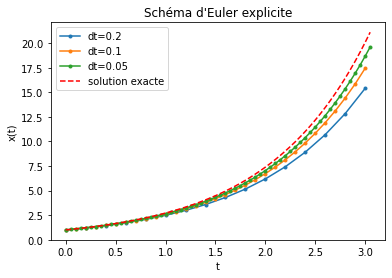

In [14]:
from matplotlib.pylab import *
def f(t,x):
    return x
def Eulerexpl(x0,t0,T,dt):
    t=t0
    x=x0
    xval=[x]
    tval=[t]
    while t<T:
        x=x+dt*f(t,x)
        t=t+dt
        xval.append(x)
        tval.append(t)
    return tval,xval
tval,xval=Eulerexpl(1,0,3,0.2)
plot(tval,xval,'.-')

xlabel('t')
ylabel('x(t)')
title("Schéma d'Euler explicite")
tval,xval=Eulerexpl(1,0,3,0.1)
plot(tval,xval,'.-')
tval,xval=Eulerexpl(1,0,3,0.05)
plot(tval,xval,'.-')
plot(tval,exp(array(tval)),'r--')
legend(['dt=0.2','dt=0.1','dt=0.05','solution exacte'])

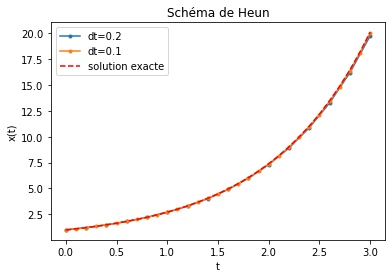

In [23]:
def Heunbis(x0,t0,T,dt):
    t=t0
    x=x0
    xval=[x]
    tval=[t]
    while t<T:
        xhalf=x+dt*f(t,x)/2
        x=x+dt*f(t+dt/2,xhalf)  
        t=t+dt
        xval.append(x)
        tval.append(t)
    return tval,xval
def Heun(x0,t0,T,dt):
    t=t0
    x=x0
    xval=[x]
    tval=[t]
    while t<T:
        y=x+dt*f(t,x)
        x=x+dt*(f(t,x)+f(t+dt,y))/2  
        t=t+dt
        xval.append(x)
        tval.append(t)
    return tval,xval
tval,xval=Heun(1,0,3,0.2)
plot(tval,xval,'.-')
xlabel('t')
ylabel('x(t)')
title("Schéma de Heun")
tval,xval=Heun(1,0,3,0.1)
plot(tval,xval,'.-')
plot(tval,exp(array(tval)),'r--')
legend(['dt=0.2','dt=0.1','solution exacte'])


### Stabilité asymptotique des schémas
Lorsque la solution exacte de l'équation différentielle est bornée pour tout temps positif, une propriété pertinente de la suite approchée par le schéma choisi est la bornitude de la suite. On parle de **stabilité asymptotique** du schéma. On verrra que cette propriété est parfois vérifiée sous une condition de petitesse sur le pas de temps $\Delta t$ et parfois sans condition. 
On va illustrer cette propriété pour l'équation différentielle scalaire amortie ($\gamma>0$):
$$
x'(t)=-\gamma x(t),
$$
dont la solution exacte, bornée en temps positif, est donnée par:
$$
x(t)=x(0) e^{-\gamma t}.
$$
Le schéma d'Euler explicite est donné par:
$$
x_{n+1}=x_n-\Delta t \gamma x_n=(1-\Delta t \gamma)x_n.
$$
On peut montrer que la suite géométrique est bornée si et seulement si $1-\Delta t \gamma\ge -1$, c'est-à-dire si $\Delta t <\frac{2}{\gamma}$.
On voit apparaitre une condition de stabilité asymptotique du schéma d'Euler explicite. 

En prenant le schéma d'Euler implicite, on obtient:
$$
x_{n+1}=\frac{1}{1+\Delta t \gamma}x_n.
$$
La suite est bornée pour tout $\Delta t>0$, car c'est une suite géométrique de raison $0<\frac{1}{1+\Delta t \gamma}<1$.
Cette propriété dite de Asymptotique-stabilité est un sujet important en analyse numérique. Nous nous contenterons d'observer le comportement des schémas expérimantalement pour des équations différntielles plus complexes. On notera simplement l'intérêt d'impliciter les termes responsables de l'amortissement dans une équation différentielle. 
### Exercices
- Etudiez la stabilite asymptotique du schéma de Heun pour l'équation différentielle scalaire amortie vue précédemment.
- Soit l'équation différentielle scalaire:
$$
x'(t)+(1+\cos^2(x(t))) x(t)=0.
$$
On propose le schéma semi-implicte suivant:
$$
\frac{x_{n+1}-x_n} {\Delta t}+ (1+\cos^2(x_{n}))x_{n+1}=0.
$$
Vérifiez que la suite peut se définir simplement par récurrence. Montrez que la suite est bornée pour tout $\Delta t>0$.
- Soit l'équation différentielle scalaire:
$$
x'(t)+\gamma x^3(t)=\sin(x(t)).
$$
Proposez un schéma numérique implicite sur une partie des termes assurant un calcul élémentaire des itérés de la suite tout en garantissant la stabilité asymptotique de la suite.


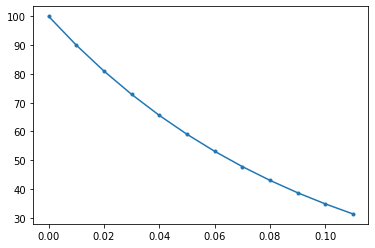

In [29]:
def f(t,x):
    return -10*x
t,x=Eulerexpl(100,0,0.1,0.01)
plot(t,x,'.-')

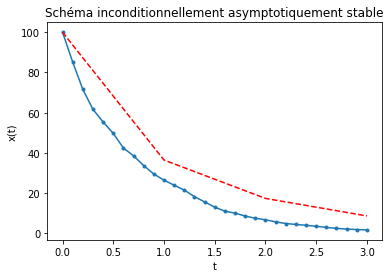

In [31]:
#schéma inconditionnellement stable
def schema(Tf,x,dt):
    t=0
    lt=[0]
    lx=[x]
    while t<Tf:
        t+=dt
        x=x/(1+dt*(1+cos(x)**2))
        lx.append(x)
        lt.append(t)
    return lt,lx
x=100.0
dt=0.1
Tf=3
lt,lx=schema(Tf,x,dt)
plot(lt,lx,'.-')
ta=array(lt)
xlabel('t')
ylabel('x(t)')
title("Schéma inconditionnellement asymptotiquement stable")
dt=1
Tf=3
lt,lx=schema(Tf,x,dt)
plot(lt,lx,'r--')

#### MCC
max(0.2CC1 + 0.4CC2+0.4CC3, 0.4CC2+0.6CC3)

# Problème aux limites du second ordre
## Problème en dimension 1
## Définition
Un problème aux limites linéaire du second ordre en dimension 1 est un problème de la forme:
$$
\begin{cases}
-(\alpha(x)u'(x))'(x)+\beta(x)u'(x)+\gamma(x) u(x)=f(x), x\in [a,b],\\
u(a)=u_a\in \mathbb{R}, u(b)=u_b\in \mathbb{R},
 \text{ (condition limite), }
\end{cases}
$$
où $\alpha,\beta,\gamma,f $ sont des fonctions sur $[a,b]$ avec $\alpha(x)>\alpha_0>0$, $\gamma(x)\ge 0$ pour tout $x\in [a,b]$.
La condition limite proposée est appelée condition de Dirichlet, elle peut être remplacée par des conditions de Neumann :
$$
\begin{cases}
u'(a)=u'_a,\\
u'(b)=u'_b.
\end{cases}
$$
ou des conditions mixtes (condition de Robin):
$$
\begin{cases}
u(a)-\delta_a u'(a)=u_a,\\
u(b)+\delta_b u'(b)=u_b,
\end{cases}
$$
avec $\delta_a\ge 0,\delta_b\ge 0$.

Les conditions de signe portées sur plusieurs paramètres (fonctions $\alpha,\gamma$, coeficients $\delta_a,\delta_b$)

sont nécessaires pour garantir l'existence et l'unicité de la solution du problème aux limites (sans que tous les paramètres ne dégénèrent). Nous ne discuterons pas ici de ces conditions.

## Contexte physique

Ces équations se rencontrent dans de nombreux problèmes de physique, par exemple dans l'étude de la répartition de la températurec dans une tige, de la déformation d'une tige, etc. Dans le contexte de la thermique, le terme d'ordre 2 est le terme de diffusion, le terme d'ordre 1 est le terme de convection et le terme d'ordre 0 est le terme d'amortissement. Le terme de source $f$ est le terme de dépôt de chaleur.

## Solutions
La solution du problème aux limites peut être calculée en dimension 1 sur des exemples simples. Sans tenir compte des conditions aux limites, la solution générale de l'équation différentielle est donnée par:
$$
u(x)=c_1 u_1(x)+c_2 u_2(x)+u_p(x),
$$
où $u_1,u_2$ sont deux solutions (non proportionnelles entre elles) de l'équation homogène associée:
$$
(\alpha(x)u'(x))'(x)+\beta(x)u'(x)+\gamma(x) u(x)=0,    
$$
et $u_p$ est une solution particulière de l'équation non-homogène:
$$
(\alpha(x)u'(x))'(x)+\beta(x)u'(x)+\gamma(x) u(x)=f(x). 
$$
Les constantes $c_1,c_2$ sont déterminées par les conditions aux limites lorsque c'est possible.
### Exemples
#### Exemple de non solution
Considérons le problème aux limites:
$$ 
\begin{cases}
u''(x)=1,~0<x<1\\
u'(0)=u'(1)=0.
\end{cases}
$$
Par intégration, la dérivée de la solution s'écrit:
$$
u'(x)=c_1+ x.
$$
En prenant en compte la condition aux limites en $x=0$, on obtient $c_1=0$  et donc $u'(1)=1$, ce qui est contradictoire avec la condition $u'(1)=0$. Il n'y a donc pas de solution à ce problème aux limites.
#### Exemple de solution
$$ 
\begin{cases}
u''(x)=1,~0<x<1\\
u(0)=u'(1)=0.
\end{cases}
$$
Par intégration, la dérivée de la solution s'écrit:
$$
u'(x)=c_1+ x.
$$
En $x=1$, la condition limite donne $c_1=-1$ et donc $u'(x)=x-1$. Par intégration, on obtient $u(x)=\frac{x^2}{2}-x+c_2$. Enfin, $c_2=0$ en prenant compte de la condition limite en $x=0$ et donc $u(x)=\frac{x^2}{2}-x$.
### Exercices
- Proposez une solution du problème aux limites:
$$
\begin{cases}
u''(x)=1,~0<x<1\\
u(0)=u(1)=0.
\end{cases}
$$
- Proposez une solution du problème aux limites:
$$
\begin{cases}
u''(x)+u'(x)=1,~0<x<1\\ 
u(0)=u(1)=0.
\end{cases}
$$
- Proposez une solution du problème aux limites:
$$
\begin{cases}
u''(x)+u(x)=1,~0<x<1\\
u'(0)=u'(1)=0.
\end{cases}
$$





## Solutions approchées par différences finies 1D.
L'objectif ici est de présenter la discrétisation différence finie 1D pour le problème de Dirichlet homogène:
$$
\begin{align}
&-u''(x)=f(x),\quad \forall x\in ]0,1[,\\
&u(0)=u(1)=0.
\end {align}
$$
### Approximation de la dérivée seconde
On rappelle que si $u$ est une fonction $\mathcal C^4$, alors
$$
-u''(x)=\frac {-u(x-h)+2u(x)-u(x+h)}{h^2}+\mathcal O(h^2).
$$
Cette formule, basée sur des évaluations de $u$ pour approcher $u''$ lorsque le réel $h>0$ est petit, va servir d'approximation évaluée en de nombreux points distants de $h$. Il s'en suivra un système linéaire.

#### Rappel des développements limités ou formule de Taylor
On suppose une fonction $f$ de $\mathbb R$ dans $\mathbb R$ de classe $\mathbf C^{k+1}$,
Pour comparer cette fonction $f$ à un polynôme $p$ au voisinage de $x_0\in \mathbb R$, on dispose de la formule de Taylor, proposée ici avec reste de Lagrange. 
$$
\begin{cases}
\exists \xi \in [\min(x,x_0),\max(x,x_0)] \text { tel que,}\\
f(x)=p(x)+\frac {f^{(k+1)}(\xi)}{(k+1)!}(x-x_0)^{k+1}\\
p(x)=f(x_0)+f'(x_0)(x-x_0)+\frac {f''(x_0)}{2}(x-x_0)^2+\cdots+\frac {f^{(k)}(x_0)}{k!}(x-x_0)^k.
\end {cases}
$$
#### Application aux différences finies
- On peut approcher la dérivée en un point par l'évaluation de la fonction au voisinage du point:
$$f^\prime(x_0)= \frac {f(x_0+h)-f(x_0)}{h}+\mathcal O(h),$$
$$f^\prime(x_0)= \frac {f(x_0+h)-f(x_0-h)}{2h}+\mathcal O(h^2).$$
Cette deuxième formule est plus précise que la première, on la nomme différence finie centrée de la dérivée,  montrons que cette deuxième formule est vraie. Par la formule de Taylor, nons avons
$$
f(x_0+h)=f(x_0)+h f'(x_0)+h^2 \frac {f''(x_0)}{2}+h^3 \frac {f'''(x_0)}{6}+\mathcal O(h^4),
$$
soit aussi
$$
f(x_0-h)=f(x_0)-h f'(x_0)+h^2 \frac {f''(x_0)}{2}-h^3 \frac {f'''(x_0)}{6}+\mathcal O(h^4).
$$
Par différence des deux relations, nous obtenons
$$
f(x_0+h)-f(x_0-h)=2h f'(x_0)+2h^3 \frac {f'''(x_0)}{6}++\mathcal O(h^4).
$$
On obtient le résultat escompté par division par $2h$.
- On peut retrouver la formule des différences finies centrées pour approcher la dérivée seconde vue précédemment en sommant les deux développements de $f(x_0+h)$ et $f(x_0-h)$ puis en divisant par $h^2$.


### Discrétisation du segment $]0,1[$


On introduit la discrétisation uniforme du segment $]0,1[$ par 
$$
x_i=i h, \quad i=0\cdots N+1,
$$
avec $h=\frac {1} {N+1}$.

### Construction des inconnues scalaires et des équations associées
Pour $i=1$ à $N$, on va approcher l'équation $-u''(x_i)=f(x_i)$. Pour $i=0$ et $i=N+1$, on va utiliser la condition limite. On note $u_i\sim u(x_i)$ et $f_i=f(x_i)$ satisfaisant 
$$
\begin {align*}
&u_0=0\\
&\frac {-u_{0}+2u_1-u_2}{h^2}=f_1\\
&\frac {-u_{1}+2u_2-u_3}{h^2}=f_2\\
&\cdots\\
&\frac {-u_{i-1}+2u_i-u_{i+1}}{h^2}=f_i\\
&\cdots\\
&\frac {-u_{N-1}+2u_N-u_{N+1}}{h^2}=f_ N\\
&u_{N+1}=0.
\end {align*}
$$
En éliminant la première et la dernière equation substituées dans la deuxième et avant-dernière equation, il vient le système de $N$ inconnues $U=(u_1,\cdots,u_N)^t$ suivant:
$$
A U=F,\quad F=(f_1,\cdots,f_N)^t,
$$
avec 
$$
A=\frac {1} {h^2}
\left (
\begin{matrix}
&2&-1&0&\cdots&0\\
&-1&2&-1&0&\cdots\\
&0&-1&2&-1&0 \\
&-&-&-&-&-\\
&0&\cdots&0&-1&2
\end{matrix}
\right )
$$
L'objectif est alors de construire ce système linéaire en python. On utilisera la gestion creuse des matrices à l'aide des outils de la bibliothèque scipy.




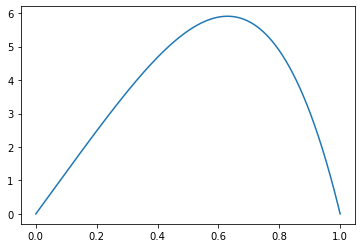

In [46]:
#importation des bibliothèques utiles
from matplotlib.pylab import *
from scipy.sparse.linalg import spsolve
from scipy.sparse import spdiags
# le pas h
N=120000
h=1/(N+1)
#h=1
# construction du vecteur de discrétisation
x=linspace(h,1-h,N)
x_avec_CL=linspace(0,1,N+2)
#construction de la fonction f de votre choix
f=lambda x : 150*x**2#-100*x
#construction du second membre du systeme
F=f(x)
#construction de la matrice en systeme creux
D0=2/h**2*ones(N)
D1=-1/h**2*ones(N)
A=spdiags(D0,[0],N,N)+spdiags(D1,[1],N,N)+spdiags(D1,[-1],N,N)
#resolution du systeme creux
U=spsolve(A,F)


#plot(x,U)

#Ajout des CL de Dirichlet





U_avec_CL=zeros(N+2)
U_avec_CL[1:N+1]=U
plot(x_avec_CL,U_avec_CL)
#On rajoute les points de discrétisation sur l'axe des abscisses.
#scatter(x,0*x,[0.1],'red')
#print(A)

### Exercices
#### Dirichlet inhomogène
Construire la solution du problème de Dirichlet inhomogène
$$
\begin{align}
&-u''(x)=f(x),\quad \forall x\in ]0,1[,\\
&u(0)=a\\
&u(1)=b.
\end {align}
$$
Choisir $f$ $a$ et $b$ à votre guise.


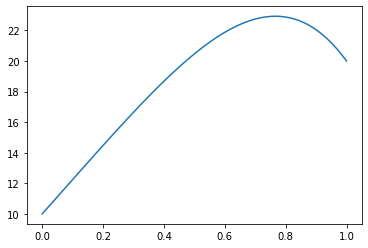

In [47]:
# le pas h
N=120000
h=1/(N+1)
a=10
b=20
#h=1
# construction du vecteur de discrétisation
x=linspace(h,1-h,N)
x_avec_CL=linspace(0,1,N+2)
#construction de la fonction f de votre choix
f=lambda x : 150*x**2#-100*x
#construction du second membre du systeme
F=f(x)
F[0]+=a/h**2
F[-1]+=b/h**2
#construction de la matrice en systeme creux
D0=2/h**2*ones(N)
D1=-1/h**2*ones(N)
A=spdiags(D0,[0],N,N)+spdiags(D1,[1],N,N)+spdiags(D1,[-1],N,N)
#resolution du systeme creux
U=spsolve(A,F)


plot(x,U)


#### Condition limite périodique
Soit le problème,
$$
\begin{align}
&-u''(x)+u(x)=f(x),\quad \forall x\in ]0,1[,\\
&u(0)=u(1), \quad u'(0)=u'(1).
\end {align}
$$
qui revient à supposer $u$ $1-$périodique et $\mathcal C^1$. Ou encore, à supposer que le domaine représente l'abscisse curviligne d'une courbe qui se referme sur elle-même (par exemple un cercle de périmètre $1$)


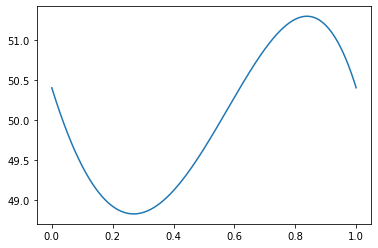

In [48]:
# le pas h
N=120000
h=1/(N)


# construction du vecteur de discrétisation
x=linspace(0,1-h,N)

#construction de la fonction f de votre choix
f=lambda x : 150*x**2#-100*x
#construction du second membre du systeme
F=f(x)

#construction de la matrice en systeme creux
D0=(2/h**2+1)*ones(N)
D1=-1/h**2*ones(N)
A=spdiags(D0,[0],N,N)+spdiags(D1,[1],N,N)+spdiags(D1,[-1],N,N)
A+=spdiags(D1,[N-1],N,N)+spdiags(D1,[-(N-1)],N,N)
#resolution du systeme creux
U=spsolve(A,F)


plot(x,U)


### Neumann homogène
Construisons la solution du problème de Neumann homogène
$$
\begin{align}
&-u''(x) +u(x)=f(x),\quad \forall x\in ]0,1[,\\
&u'(0)=u'(1)=0.
\end {align}
$$
On introduit la discrétisation uniforme du segment $]0,1[$ par 
$$
x_i=i h, \quad i=0\cdots N-1,
$$
avec $h=\frac 1 {N-1}$.
Pour $i=0$ à $N-1$, on va approcher l'équation $-u''(x_i)+u(x_i)=f(x_i)$ de la même manière que pour le problème de Dirichlet. On note $u_i\sim u(x_i)$ et $f_i=f(x_i)$.
Pour $i=0$ et $i=N-1$, on introduit alors $u_{-1}$ et $u_{N}$ qu'il convient d'éliminer par la condition limite de Neuman homogène. On remarque que la différence centrée qui approche la dérivée ($u'(x)=\frac {u(x+h)-u(x-h)} {2h}$) permet d'écrire
$$
u_{-1}=u_1,\quad u_{N}=u_{N-2}.
$$
On a alors le système linéaire
$$
\left \{\begin {align}
&u_{-1}=u_1\\
&\frac {-u_{-1}+2u_0-u_1}{h^2}+u_0=f_0\\
&\frac {-u_{0}+2u_1-u_2}{h^2}+u_1=f_1\\
&\frac {-u_{1}+2u_2-u_3}{h^2}+u_2=f_2\\
&\cdots\\
&\frac {-u_{i-1}+2u_i-u_{i+1}}{h^2}+u_i=f_i\\
&\cdots\\
&\frac {-u_{N-2}+2u_{N-1}-u_{N}}{h^2}+u_{N-1}=f_{N-1}\\
&u_{N}=u_{N-2}.
\end {align}\right .
$$
En éliminant la première et la dernière equation substituées dans la deuxième et avant-dernière equation, il vient le système de $N$ inconnues $U=(u_0,\cdots,u_{N-1})^t$ suivant:
$$
A U=F,\quad F=\left (f_0,\cdots,f_{N-1}\right)^t,
$$
avec 
$$
A=\frac 1 {h^2}\left (\begin {matrix}&2&-2&0&\cdots&0\\
&-1&2&-1&0&\cdots\\
&0&-1&2&-1&0 \\
&-&-&-&-&-\\
&0&\cdots&0&-2&2\end{matrix}\right )+Id
$$
Par soucis de symétrie dans le système et parce que cela est pertinent pour les méthodes de résolution de système linéaire, on symétrise le système en divisant par $2$ la première et dernière équation du système. On obtient alors le système:
$$
A U=F,\quad F=\left(\frac {f_{0}}2,f_1,\cdots,f_{N-2},\frac {f_{N-1}}2\right)^t,
$$
avec 
$$
A=\frac 1 {h^2}\left (\begin {matrix}&1&-1&0&\cdots&0\\
&-1&2&-1&0&\cdots\\
&0&-1&2&-1&0 \\
&-&-&-&-&-\\
&0&\cdots&0&-1&1\end{matrix}\right )+\left (\begin {matrix}&\frac 1 2&0& &\cdots&0\\
&0&1&0& &\cdots\\
&&0&1&0& \\
&-&-&-&-&-\\
& &\cdots& &0&\frac 1 2\end{matrix}\right )
$$


L'objectif est alors de construire ce système linéaire en python. On utilisera la gestion creuse des matrices à l'aide des outils de la bibliothèque scipy.

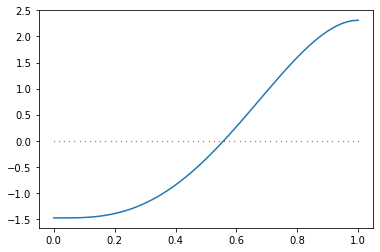

In [49]:
# le pas h
N=60
h=1/(N-1)
# construction du vecteur de discrétisation
x=linspace(0,1,N)
#construction de la fonction f de votre choix
f=lambda x : 150*x**2-100*x
#construction du second membre du systeme
F=f(x)
F[0]=0.5*F[0]
F[N-1]=0.5*F[N-1]
#construction de la matrice en systeme creux
D0=(2/h**2+1)*ones(N)
D0[0]=0.5*D0[0]
D0[N-1]=0.5*D0[N-1]
D1=-1/h**2*ones(N)
A=spdiags(D0,[0],N,N)+spdiags(D1,[1],N,N)+spdiags(D1,[-1],N,N)
U=spsolve(A,F)
plot(x,U)
#On rajoute les points de discrétisation sur l'axe des abscisses.
scatter(x,0*x,[0.1],'red')

### Exercices
- Proposez l'approximation et la résolution du problèmes de Neumann inhomogène
- Proposez l'approximation et la résolution du problèmes de Robin homogène
soit, pour $a$ et $b$ réels positifs,
$$u'(0)-au(0)=0, u'(1)+bu(1)=0.$$


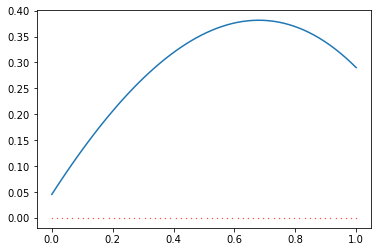

In [50]:
from scipy.sparse import lil_matrix, csr_matrix
#probleme de Robin
a=20 #coeff de robin en 0
b=2 #coeff de robin en 1
# le pas h
N=60
h=1/(N-1)
# construction du vecteur de discrétisation
x=linspace(0,1,N)
#construction de la fonction f de votre choix
f=lambda x : 1+x#150*x**2-100*x
#construction du second membre du systeme
F=f(x)
F[0]=0.5*F[0]
F[N-1]=0.5*F[N-1]
#construction de la matrice en systeme creux
D0=(2/h**2)*ones(N)
D0[0]+=2*a/h
D0[N-1]+=2*b/h
D1=-1/h**2*ones(N)
A=spdiags(D0,[0],N,N)+spdiags(D1,[1],N,N)+spdiags(D1,[-1],N,N)
A=A.tolil()
A[0,1]*=2
A[N-1,N-2]*=2
A=A.tocsr()
U=spsolve(A,F)
plot(x,U)
#On rajoute les points de discrétisation sur l'axe des abscisses.
scatter(x,0*x,[0.1],'red')

- Proposez l'approximation et la résolution du problèmes de Robin inhomogène


### Estimation d'erreur
On va estimer l'erreur entre la solution approchée par la méthode des différences finies centrées et la solution exacte du problème . La théorie dit que l'erreur d'approximation  est d'ordre 2, c'est à dire de taille $\mathcal O(h^2)$ et fait plus précisément intervenir la dérivée quatrième de la solution exacte. Ainsi si la solution est un polynôme de degré inférieur ou égal à 3, la solution  approchée coincide avec la solution exacte en chacun des points de la discrétisation $x_i$.
Il conviendra donc de choisir une solution exacte qui n'est pas un polynôme de degré inférieur à 3 et qui satisfait bien-sûr les conditions limites.
### Problème de Dirichlet
Choisissons par exemple la solution non triviale $u(x)=\sin(x^2)\sin(x-1)$ du problème de Dirichlet
$$
\begin{align*}
&-u''(x)=f(x),\quad \forall x\in ]0,1[,\\
&u(0)=u(1)=0.
\end {align*}
$$
Il convient de calculer $f$ afin de satisfaire que $u(x)=\sin(x^2)\sin(x-1)$ est bien solution. Pour des problèmes plus compliqué, on pourra faire appel au calcul formel avec la librairie sympy.

In [51]:
import sympy as sy
x=sy.symbols('x')
y=sy.sin(x**2)*sy.sin(x-1)
z=sy.diff(y,x)
z2=sy.diff(z,x)
print(-z2)

4*x**2*sin(x**2)*sin(x - 1) - 4*x*cos(x**2)*cos(x - 1) + sin(x**2)*sin(x - 1) - 2*sin(x - 1)*cos(x**2)


On sait désormais l'expression de $f$. On va alors construire cette fonction et définir la solution exacte. 
En définissant l'erreur entre la solution exacte et approchée, pour la norme de notre choix, comme une fonction python qui dépend de la taille de la discrétisation, on pourra alors calculer aisément l'erreur pour plusieurs discrétisation. La fonction construite sera également paramètrée par la fonction $f$, $u$ (solution exacte) et un entier qui caractérise la norme choisie.

0.00041144934293248664
l'ordre de la méthode en h est : 1.9998884846416005


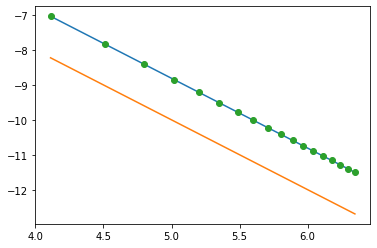

In [10]:
from scipy.sparse import spdiags
from scipy.sparse.linalg import spsolve
from matplotlib.pylab import *
u=lambda x: sin(x**2)*sin(x-1)
f=lambda x: 4*x**2*sin(x**2)*sin(x - 1) - 4*x*cos(x**2)*cos(x - 1) + sin(x**2)*sin(x - 1) - 2*sin(x - 1)*cos(x**2)
#
# La fonction pour calculer l'erreur
#
def erreur_Dirchlet(N,u,f,p):
# N est le nombre de points de discrétisation
# u et f les fonctions passées en argumennt, on pourra en changer 
# en definissant d'autres fonctions
# p est l'entier pour la norme l^p
    h=1/(N+1)
    # construction du vecteur de discrétisation
    x=linspace(h,1-h,N)
    #construction du second membre du systeme
    F=f(x)
    #construction de la matrice en systeme creux
    D0=2/h**2*ones(N)
    D1=-1/h**2*ones(N)
    A=spdiags(D0,[0],N,N)+spdiags(D1,[1],N,N)+spdiags(D1,[-1],N,N)
    A=A.tocsr()
    #resolution du systeme creux
    U=spsolve(A,F)
    #le vecteur erreur err
    err=abs(U-u(x))
    #on présente le graphe des erreurs selon les points de discretisation
#    plot(x,err)
#    print([ei**p for ei in err],sum([ei**p for ei in err]))
    normerr=sum([ei**p for ei in err])
    normerr=normerr**(1/p)
    #erreur relative
    normeU=sum([abs(ui)**p for ui in U])
    normeU=normeU**(1/p)
    #return max(err)/max(abs(U))
    return normerr/normeU

#on evalue l'erreur
print(erreur_Dirchlet(40,u,f,2))
u=lambda x: sin(2*pi*x)
f=lambda x: 4*pi**2*sin(2*pi*x)
errtab=[]
Ntab=[]
for N in range(60,600,30):
    Ntab.append(N+1)
    errtab.append(erreur_Dirchlet(N,u,f,2))
plot(log(Ntab),log(errtab),log(Ntab),-2*log(Ntab))
plot(log(Ntab),log(errtab),'o')
print("l'ordre de la méthode en h est :",-polyfit(log(Ntab),log(errtab), 1)[0])

## Problème en dimension 2
### Définition
Un problème aux limites linéaire du second ordre en dimension 2 est un problème de la forme:
$$
\begin{cases}
-\sum_{0\le i+j\le 1,0\le k+l\le 1}\partial_1^i\partial_2^j\left(\alpha_{i,j,k,l}(x_1,x_2)\partial_1^k\partial_2^l \right )u(x_1,x_2)=f(x_1,x_2), (x_1,x_2)\in \Omega,\\
u_{\partial \Omega}=u_b,
 \text{ (condition limite), }
\end{cases}
$$
Par exemple $\Omega=[0,L]\times[0,H]$.
Pour des raisons d'existence de solution, il sera essentiel que la matrice 
$$\Alpha=\begin {pmatrix}\alpha_{1,0,1,0}&\alpha_{1,0,0,1}\\\alpha_{0,1,1,0}&\alpha_{0,1,0,1}\end{pmatrix}$$
soit définie positive et que $\alpha_{0,0,0,0}\ge 0$.

### Problème de Dirichlet 2D
On considère l'extension du problème de Dirichlet 1D homogène au 2D en se limitant à des domaines cartésiens: $\Omega=[0,L]\times[0,H]$. Quitte à changer les notations de la variable spatiale ($(x,y)\in\Omega$),
$$
\begin{cases}
-\Delta u(x,y)=-\partial_x^2 u(x,y)-\partial_y^2 u(x,y)=f(x,y),\quad \forall (x,y)\in \Omega=]0,L[\times]0,H[,\\
u(x,y)=0, \quad \forall (x,y)\in \partial \Omega.
\end {cases}
$$
L'opérateur $\Delta$ se nomme le Laplacien.

On va pouvoir approcher la dérivée seconde dans chaque direction exactement comme en 1D ens'appuyant sur les valeurs de $u$ sur une grille uniforme de pas $(dx,dy)$.
Si $u$ est une fonction $\mathcal C^4$, alors
$$
-\Delta u(x,y)=\frac {-u(x-l,y)+2u(x,y)-u(x+l,y)}{l^2}+\frac {-u(x,y-h)+2u(x,y)-u(x,y+h)}{h^2}+\mathcal O(l^2+h^2).
$$
Cette formule, basée sur des évaluations de $u$ sur une grille Cartésienne de pas $l$ dans la direction $x$ et de pas $h$ dans la direction $y$, va servir d'approximation de l'équation. Il s'en suivra un système linéaire dont le nombre d'inconnues est le nombre de points de grille internes au domaine $\Omega$.
On représente les points de la grille pour lesquels l'équation sera discrétisée.

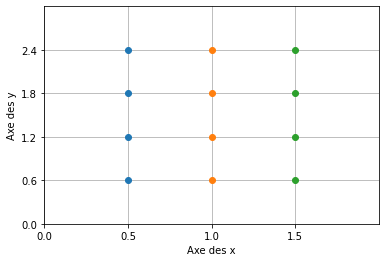

In [53]:
# taille du domaine [0,L]x[0,H]
L=2.;
H=3.;
# nombre de points de discretisation internes et pas de maillage
N=3;
M=4;
l=L/(N+1);
h=H/(M+1);
# vecteur discretisation selon x
x=linspace(l,L-l,N)
# vecteur discretisation selon y
y=linspace(h,H-h,M)
xx,yy=meshgrid(x,y)
xx1=xx.reshape(N*M)
yy1=yy.reshape(N*M)
plot(xx,yy,'o')
xlim(0, L)  # Limites pour l'axe des x (de 0 à 12)
plt.ylim(0, H)  # Limites pour l'axe des y (de -1.5 à 1.5)

# Ajouter des labels
xlabel('Axe des x')
ylabel('Axe des y')
xticks(np.arange(0, L, l))
yticks(np.arange(0, H, h))
grid(True)

### Numérotation

Il convient alors de numéroter ces points à l'aide d'un seul indice en choisissant un sens de parcours de tous ces points. Puis, on écrira pour chacun d'eux la discrétisation et ainsi les coefficients de la matrice correspondante à ce parcours, ie cette numérotation. Pour le point numéro $k$, on sera en mesure de remplir la ligne numéro $k$ de la matrice. Celle-ci contiendra donc $NM$ lignes et colonnes.

La manière la plus classique de numéroter est de parcourir de gauche à droite depuis la ligne du bas jusqu'à la ligne du haut. Le premier point de chaque ligne est un point particulier car son voisin gauche tombe sur le bord. Il en va de même du dernier de chaque ligne dont le voisin de droite est sur le bord droit. La première et dernière ligne sont aussi des cas particuliers puisque le voisin du bas ou du haut tombe sur la bord bas ou haut.

Si on considère le noeud $k$ associé aux indices $1\le i\le N$ et $1\le j\le M$ de la numérotation horizontale et verticale, on a $k=num(i,j)=i+(j-1)N$. Si on choisit $k=num(i,j)$ de sorte que $1< i< N$ et $1< j< M$ (noeud non voisin du bord), le voisin de gauche a le numéro $k-1$, le voisin de droite a le numéro $k+1$, le voisin du bas a le numéro $k-N$, le voisin du haut a le numéro $k+N$.

### Structure de la matrice

On en déduit que la matrice sera pentadiagonale avec une diagonale principale, une sous-diagonale décalée de $1$, une sous-diagonale décalée de $N$, une sur-diagonale décalée de $1$, une sur-diagonale décalée de $N$.  
Il faudra gérer les cas particuliers des noeuds proche du bord afin de prendre en compte les voisins du bord pour lequel la solution est nulle (Dirichlet inhomogène).

L'assemblage se construit donc à l'aide de 5 diagonales dont il faudra corriger ou vérifier les $N$ premières lignes, les $N$ dernières lignes, ainsi que la première ligne de chaque sous-bloc de taille $N$ (points gauches) et ainsi que la dernière ligne de chaque sous-bloc de taille $N$ (points droits).

On doit se convaincre sur un brouillon que la matrice obtenue est symétrique et avoir su corriger la sur-diagonale et la sous-diagonale de la matrice en introduisant des zéros pour les noeuds proches des bords gauche et droit. 


### Remplissage de la matrice en python
On utilise ci-dessous le stockage creux sous forme de diagonales de la matrice (spdiags) une fois que les diagonales sont précisement construites sur un brouillon.

In [54]:
from matplotlib.pylab import *
from scipy.sparse.linalg import spsolve
from scipy.sparse import spdiags
from time import time
#2D
#Probleme Dirichlet homogene 2D 
#
# taille du domaine [0,L]x[0,H]
L=2.;
H=3.;
# nombre de points de discretisation et pas de maillage
N=30;
M=40;
#
l=L/(N+1);
h=H/(M+1);
# vecteur discretisation selon x
x=linspace(l,L-l,N)
# vecteur discretisation selon y
y=linspace(h,H-h,M)
#construction de la matrice A par ses diagonales 
#
D0=(2/(l**2)+2/(h**2))*ones(N*M)# diagonale principale
D1=-1/l**2*ones(N*M)# surdiagonale
D1[N::N]=0.#correction de la surdiagonale (voisin de droite n existe pas au bord droit)
DM1=-1/l**2*ones(N*M)# sousdiagonale
DM1[N-1::N]=0.#correction de la sousdiagonale (voisin de gauche n existe pas au bord gauche)
DN=-1/h**2*ones(N*M)
A=spdiags(D0,[0],N*M,N*M)+spdiags(D1,[1],N*M,N*M)+spdiags(DM1,[-1],N*M,N*M)
A=A+spdiags(DN,[N],N*M,N*M)+spdiags(DN,[-N],N*M,N*M)# A est pentadiagonale
#construction d'un second membre trivial
f=ones(N*M)
#
#resolution du systeme lineaire creux
#
t=time()
u=spsolve(A,f)
t2=time()
print('resolution systeme done in %5.4f s' % (t2 - t)) 
display(A.toarray())

resolution systeme done in 0.0120 s


array([[ 854.05555556, -240.25      ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [-240.25      ,  854.05555556, -240.25      , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        , -240.25      ,  854.05555556, ...,    0.        ,
           0.        ,    0.        ],
       ...,
       [   0.        ,    0.        ,    0.        , ...,  854.05555556,
        -240.25      ,    0.        ],
       [   0.        ,    0.        ,    0.        , ..., -240.25      ,
         854.05555556, -240.25      ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
        -240.25      ,  854.05555556]])

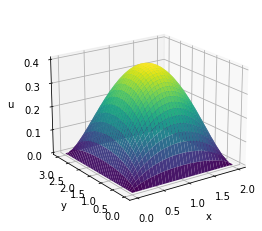

In [55]:
# representation graphique de la solution
uu=reshape(u,(M,N))
uubord=0*ones((M+2,N+2));
uubord[1:M+1,1:N+1]=uu;
#print(A.toarray())
from mpl_toolkits import mplot3d
ax = axes(projection='3d')
X, Y = meshgrid(linspace(0,L,N+2),linspace(0,H,M+2))
ax = axes(projection='3d')
#ax.contour3D(X, Y, uubord, 50, cmap='binary')
ax.plot_surface(X, Y, uubord, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none');
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u');
ax.view_init(20, -125)

Pour éviter de construire à la main chacune des diagonales, on peut préférer un remplissage algorithmique de la matrice en identifiant les noeuds de discrétisation qui sont proches des bords, ceux des coins et les autres. Une première étape peut consister à lister ces noeuds selon des considérations purement géométrique et de numérotation. On peut alors assembler chaque coefficient non nul de la matrice en oubliant la structure diagonale et en procédant à un remplissage de matrice creuse au format d'une liste (le format lil_matrix de scipy.sparse). On pourra alors convertir cette matrice en une matrice creuse au format csr_matrix pour la résolution du système linéaire.
##### Exercices
- Proposer le stockage tridiagonal pour le problème de Dirichlet 1D en fortran 
- Coder le produit matrice vecteur avec cette structure de matrice
- Etendre vos solveurs gradient conjugué et BICGstab en conséquence
- Comparer le temps calcul entre la résolution pleine et creuse pour différentes taille de grille.
- Faites le même travail pour le problème de Dirichlet 2D avec un stockage pintadiagonale. 
- Pour une utilisation la plus large possible, on pourra déclarer un tableau de taille $N\times d$ où $N$ est la taille de la grille (taille du vecteur inconnu) et $d$ le nombre de diagonale. On disposera aussi d'un tableau d'entiers de taille $d$ qui donne l'entier relatif du décalage de la diagonale considérée par rapport à la diagonale principale. 

## Stockage CSR
Le format CSR (Compressed Sparse Row) est une méthode efficace pour stocker des matrices creuses (sparse) en ne gardant en mémoire que les éléments non nuls, réduisant ainsi la consommation mémoire. Ce format est particulièrement utilisé dans le cadre des calculs scientifiques pour les systèmes d'équations de grandes dimensions.

Structure du format CSR :
Le stockage CSR utilise trois tableaux principaux :

values : Contient tous les éléments non nuls de la matrice, rangés ligne par ligne.

col_indices : Contient les indices des colonnes correspondants à chaque élément non nul dans le tableau values.

row_ptr : Stocke les indices dans le tableau values où commence chaque nouvelle ligne de la matrice. Le dernier élément de ce tableau pointe à la fin du tableau values pour connaître la taille totale.

Exemples de matrice et de son stockage en CSR
Considérons la matrice creuse suivante :
$$
A = \begin{pmatrix}
10 & 0 & 0 & 0 & 0 \\
3  & 9 & 0 & 0 & 0 \\
0  & 7 & 8 & 7 & 0 \\
3  & 0 & 8 & 7 & 5 \\
0  & 8 & 0 & 9 & 9
\end{pmatrix}
$$
 
**Stockage CSR :**
- values : Contient les valeurs non nulles ligne par ligne :

$$
    \texttt{values} = [10, 3, 9, 7, 8, 7, 3, 8, 7, 5, 8, 9, 9]
$$
    
- col_indices : Contient les indices des colonnes correspondantes pour chaque élément non nul dans values  :
$$
\texttt{col-indices} = [0, 0, 1, 1, 2, 3, 0, 2, 3, 4, 1, 3, 4]
$$
    
- row_ptr : Contient les indices dans values où chaque ligne commence (la longueur de ce tableau est $n+1$, où $n$ est le nombre de lignes de la matrice) :
$$
\texttt{row-ptr} = [0, 1, 3, 6, 10, 13]
$$
Cela signifie :

- La ligne 1 commence à l'index 0 dans values.
- La ligne 2 commence à l'index 1.
- La ligne 3 commence à l'index 3, et ainsi de suite.

Ce format n'est pas adapté lorsqu'on ne connaît pas la structure de la matrice au préalable. C'est pourquoi, on se sert de la conversion au format csr_matrix une fois que la matrice est finie d'être construite au format lil_matrix.


In [56]:
from scipy.sparse import lil_matrix, csr_matrix
# grille pour Dirichlet 2D
# 
L=3
H=4
Nx=3
Ny=4
dx=L/(Nx+1)
dy=H/(Ny+1)
x=linspace(dx,L-dx,Nx)
y=linspace(dy,H-dy,Ny)

#liste des numéros des noeuds presentants 4 voisins faisant partie des noeuds où la solution est inconnue
# soient les noeuds en Xint_1,Yint_1

Linterieur=[]
for j in range(1,Ny-1):
    for i in range(1,Nx-1):
        Linterieur.append(int(i+j*Nx))  
print(len(Linterieur),max(Linterieur))
#
#liste des noeuds du bas sauf coins
Lbas=[i for i in range(1,Nx-1)]
#liste des noeuds du haut sauf coins
Lhaut=[i for i in range(Nx*(Ny-1)+1,Nx*Ny-1)]
#liste des noeuds de gauche sauf coins
Lgauche=[i*Nx for i in range(1,Ny-1)]
#liste des noeuds de droite sauf coins
Ldroite=[i*Nx-1 for i in range(2,Ny)]


A=lil_matrix((Nx*Ny,Nx*Ny))
#construction de la diagonale de A
for k in range(Nx*Ny):
    A[k,k]=2/dx**2+2/dy**2
#construction de la matrice A pour les noeuds presentants 4 voisins inconnus
for k in Linterieur:
    A[k,k+1]=-1/dx**2
    A[k,k-1]=-1/dx**2
    A[k,k+Nx]=-1/dy**2
    A[k,k-Nx]=-1/dy**2
# contribution pour les noeuds du bas
for k in Lbas:
    A[k,k+1]=-1/dx**2
    A[k,k-1]=-1/dx**2
    A[k,k+Nx]=-1/dy**2
# contribution pour les noeuds du haut
for k in Lhaut:
    A[k,k+1]=-1/dx**2
    A[k,k-1]=-1/dx**2
    A[k,k-Nx]=-1/dy**2
# contribution pour les noeuds de gauche
for k in Lgauche:
    A[k,k+1]=-1/dx**2
    A[k,k+Nx]=-1/dy**2
    A[k,k-Nx]=-1/dy**2
# contribution pour les noeuds de droite
for k in Ldroite:
    A[k,k-1]=-1/dx**2
    A[k,k+Nx]=-1/dy**2
    A[k,k-Nx]=-1/dy**2
#coin bas gauche
k=0
A[k,k+1]=-1/dx**2
A[k,k+Nx]=-1/dy**2
#coin bas droite
k=Nx-1
A[k,k-1]=-1/dx**2
A[k,k+Nx]=-1/dy**2
#coin haut gauche
k=Nx*(Ny-1)
A[k,k+1]=-1/dx**2
A[k,k-Nx]=-1/dy**2
#coin haut droite
k=Nx*Ny-1
A[k,k-1]=-1/dx**2
A[k,k-Nx]=-1/dy**2

A=csr_matrix(A)
print(A.toarray())
print(Linterieur)

2 7
[[ 6.68055556 -1.77777778  0.         -1.5625      0.          0.
   0.          0.          0.          0.          0.          0.        ]
 [-1.77777778  6.68055556 -1.77777778  0.         -1.5625      0.
   0.          0.          0.          0.          0.          0.        ]
 [ 0.         -1.77777778  6.68055556  0.          0.         -1.5625
   0.          0.          0.          0.          0.          0.        ]
 [-1.5625      0.          0.          6.68055556 -1.77777778  0.
  -1.5625      0.          0.          0.          0.          0.        ]
 [ 0.         -1.5625      0.         -1.77777778  6.68055556 -1.77777778
   0.         -1.5625      0.          0.          0.          0.        ]
 [ 0.          0.         -1.5625      0.         -1.77777778  6.68055556
   0.          0.         -1.5625      0.          0.          0.        ]
 [ 0.          0.          0.         -1.5625      0.          0.
   6.68055556 -1.77777778  0.         -1.5625      0.          0

### Exercices
- Vérifier que la matrice obtenue ci-dessus est la même que par l'assemblage par diagonale.
- Proposer une méthode de vérification (ou validation) de la matrice en testant une solution analytique et en calculant l'erreur pour différentes tailles de grille.
- En liant les pas de discrétisation $dx=l$ et $dy=h$ par exemple $N+1=2(M+1)$, vérifier que l'erreur suit bien une loi de convergence d'ordre 2.
- On va valider également le problème avec des conditions limites modifiées. 
Soit le problème qui mixte Dirichlet et Neumann:
$$
\begin{cases}
-\Delta u(x,y)=f(x,y),\quad \forall (x,y)\in \Omega=]0,L[\times]0,H[,\\
u(x,0)=u(x,H)=0, \quad \forall x\in ]0,L[\\
u(0,y)=0\quad \forall y\in ]0,H[\\
\partial_x u(L,y)=0\quad \forall y\in ]0,H[.
\end {cases}
$$

In [57]:
from matplotlib.pylab import *
from scipy.sparse.linalg import spsolve
from scipy.sparse import spdiags
from time import time
#Probleme Dirichlet/Neumann homogene 2D (neumann sur bord droit)
#
# taille du domaine [0,L]x[0,H]
L=2.;
H=3.;
# nombre de points de discretisation et pas de maillage
N=130;
M=140;
#
l=L/(N);
h=H/(M+1);
# vecteur discretisation selon x
x=linspace(l,L,N)
# vecteur discretisation selon y
y=linspace(h,H-h,M)
#construction de la matrice A par ses diagonales 
#
D0=(2/(l**2)+2/(h**2))*ones(N*M)# diagonale principale
D1=-1/l**2*ones(N*M)# surdiagonale
D1[N::N]=0.#correction de la surdiagonale (voisin de droite n existe pas au bord droit)
DM1=-1/l**2*ones(N*M)# sousdiagonale
DM1[N-1::N]=0.#correction de la sousdiagonale (voisin de gauche n existe pas au bord gauche)
DM1[N-2::N]=-2/l**2#correction de la sousdiagonale (neumann)
DN=-1/h**2*ones(N*M)
A=spdiags(D0,[0],N*M,N*M)+spdiags(D1,[1],N*M,N*M)+spdiags(DM1,[-1],N*M,N*M)
A=A+spdiags(DN,[N],N*M,N*M)+spdiags(DN,[-N],N*M,N*M)# A est pentadiagonale
#construction d'un second membre trivial
f=-ones(N*M)
#
#resolution du systeme lineaire creux
#
t=time()
u=spsolve(A,f)
t2=time()

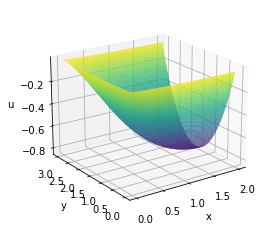

In [58]:
uu=u.reshape((M,N))

from mpl_toolkits import mplot3d
ax = axes(projection='3d')
X, Y = meshgrid(x,y)
ax = axes(projection='3d')
#ax.contour3D(X, Y, uubord, 50, cmap='binary')
ax.plot_surface(X, Y, uu, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none');
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u');
ax.view_init(20, -125)

# La transformée de Fourier discrète 1D

On rappelle la définition de transformée de Fourier discrète.

***Définition***: Soit un vecteur $\textbf{u}=(u_0,\cdots,u_{N-1})^t$ de $\mathbb C^N$, on note $\hat{\textbf{u}}$ le vecteur de $\mathbb C^N$, image de $\textbf{u}$ par la transformée de Fourier discrète défini par :
$$\hat{\textbf{u}}_k = \frac{1}{N}\sum_{j=0}^{N-1}u_j e^{-2i\pi  j k / N}, \quad \forall \, k\in \textbf{k}=0, 1, \ldots, N-1,$$
Cette transformation admet une transformation réciproque appelée transformée de Fourier inverse donnée par :
$$
u_j = \sum_{k=0}^{N-1}\hat{\textbf{u}}_k e^{2i\pi  j k / N}, \quad \forall \, j\in\textbf{j}=0, 1, \ldots, N-1.$$

Dans le but d'utiliser cette transformation pour des EDPs, Il est intéressant de voir le vecteur $\textbf{u}$ comme l'évaluation sur une grille régulière d'une fonction périodique et ainsi voir les coefficients de la transformée de Fourier comme les coefficients de la fonction décomposée dans une base de fonction trigonométrique périodique. Nous allons préciser cela.

Soit $u$ une fonction définie de $\mathbb R$ dans $\mathbb C$ supposée $L$-périodique. On note $\textbf{x}=(0, h, \ldots, (N-1)h)$ avec $h=\frac L N$. On note $\phi_k$ ($0\le k<N$) les fonctions :
$$ \phi_k(x)=e^{2i\pi  k\frac x L},~x\in[0,L[.$$
On reécrit la transformée de Fourier discrète pour $\textbf{u}=u(\textbf{x})$ (au sens de Hadamard) et on a 
$$
\textbf{u}=u(\textbf{x})=\sum_{k=0}^{N-1}\hat{\textbf{u}}_k  \phi_k(\textbf{x}).
$$
Si de plus $u\in Vect(\phi_k, ~0\le k<N)$ alors $u=\sum_{k=0}^{N-1}\hat{\textbf{u}}_k  \phi_k$.

Le choix de la base $Vect(\phi_k, ~0\le k<N)$ est un choix pertinent de base pour une méthode de Galerkine pour des EDPs à coefficients constants et des conditions limites périodiques. Ce point sera détaillé plus tard. Il faut d'abord évaluer le coût d'un changement de base pour passer des coefficients de l'évaluation de la fonction sur la grille aux coefficients de Fourier.

# Coût d'une transformée de Fourier
Une application directe des formules de transformation montre une complexité en $\mathcal O(N^2)$ puisque chacun des $N$ coefficients nécessite de l'ordre de $N$ sommes et $N$ produits. Il existe cependant un algorithme dit "FFT" pour "Fast Fourier Transform" qui repose sur un découpage récursif de la transformation en exploitant les propriétés de l'exponentielle complexe. Il s'agit de l'algorithme de Cooley-Tukey dont la construction est triviale si on se limite à $N$ une puissance de $2$.

$$\hat{\textbf{u}}_k = \frac{1}{N}\sum_{j=0}^{N-1}u_j e^{-2i\pi  j k / N}=\frac{1}{N}\sum_{j=0}^{N-1}u_j W_N^{kj},$$
où $W_{N}=e^{-2i\pi / N}$. On note ici $\mathcal F_N(\textbf{u})=\hat{\textbf{u}}$ et $\textbf{u}^{odd}\in \mathbb C^{N/2}$ le vecteur des indices impairs et $\textbf{u}^{even}\in \mathbb C^{N/2}$ le vecteur des indices pairs. On supposera ici $N$ une puissance de $2$.
Ainsi, comme $W_N=W_{N/2}^2$,
\begin{split}
\mathcal F_N(\textbf{u})_k &=\frac{1}{N}\sum_{j=0}^{N-1}u_j W_N^{kj}=\frac{1}{N}\sum_{j=0}^{N/2-1}u_{2j} W_{N}^{2kj}+\frac{1}{N}\sum_{j=0}^{N/2-1}u_{2j+1} W_N^{k(2j+1)}\\
&=\frac 1 2\frac 1 {N/2}\sum_{j=0}^{N/2-1}u^{even}_{j} W_{N/2}^{kj}+\frac 1 2\frac 1 {N/2}\sum_{j=0}^{N/2-1}u^{odd}_{j} W_{N/2}^{kj}W_N^k
\end{split}
Finalement, pour $k<N/2$, on a directement :
$$
\mathcal F_N(\textbf{u})_k=\frac 1 2\mathcal F_{N/2}(\textbf{u}^{even})_{k}+\frac 1 2 W_N^k\mathcal  F_{N/2}(\textbf{u}^{odd})_{k}. 
$$
Si $k\ge N/2$, on retranche $N/2$ à $k$ et on l'ajoute pour écrire la transformée discrète d'indice supérieure à $N/2$ en fonction des indices admissibles de la transformée discrète des vecteurs d'indices paires et impaires de taille $N/2$. Pour $k\ge N/2$,
\begin{split}
\mathcal F_N(\textbf{u})_k 
&=\frac 1 2\frac 1 {N/2}\sum_{j=0}^{N/2-1}u^{even}_{j} W_{N/2}^{(k-N/2)j}W_{N/2}^{jN/2}+\frac 1 2\frac 1 {N/2}\sum_{j=0}^{N/2-1}u^{odd}_{j} W_{N/2}^{(k-N/2)j}W_N^kW_{N/2}^{jN/2}
\\
&=\frac 1 2\mathcal F_{N/2}(\textbf{u}^{even})_{k-N/2}+\frac 1 2W_N^k\mathcal  F_{N/2}(\textbf{u}^{odd})_{k-N/2},\\
&=\frac 1 2\mathcal F_{N/2}(\textbf{u}^{even})_{k-N/2}-\frac 1 2W_N^{k-N/2}\mathcal  F_{N/2}(\textbf{u}^{odd})_{k-N/2}
\end{split}
puisque $W_{N/2}^{jN/2}=1$ et $W_{N}^{N/2}=-1$.

Le calcul de complexité s'obtient par récurrence sur $l$ avec $N=2^l$. En notant $c_l$ la complexité en fonction de $l$, on a $c_{l+1}=2c_l+2^{l+2}$. Ainsi $c_l=(c_0+4l)2^l$, soit $c_l=(1+4\log_2(N))N=\mathcal O(N\log_2(N))$.
Ce coût est drastiquement inférieur au coût d'un calcul direct en $\mathcal O(N^2)$.

# Méthode de Galerkine

Pour comprendre l'intérêt de la FFT pour la résolution de certaines EDPs, il suffit de réaliser que la base $Vect(\phi_k, ~0\le k<N)$ est une base orthogonale de vecteurs propres pour les opérateurs de dérivation avec condition limite périodique. En dimension supérieure, c'est encore vrai; pour d'autres conditions limites, Dirichlet et Neumann, c'est encore vrai pour les opérateurs de dérivation paire avec des bases trigonométriques modifiées construites avec une complexité encore en $\mathcal O(N\log_2(N))$.

***Exemple***: On considère la solution $1$ périodique de $-u''(x)=f(x)$ pour une fonction $f$ $1-$périodique donnée à moyenne nulle et par exemple dans $L^2(0,1)$. On note $P_N$ la projection sur $V_N=Vect(\phi_k, ~0\le k<N)$. On cherche alors $u_N\in V_N$ tel que $-u_N''=P_N f$. Ainsi, on cherche $N$ scalaires $u_i$, $0\le i<N$ tel que 
$$
u_N=\sum_{k=0}^{N-1} \hat u_k \phi_k,~P_N f=\sum_{k=0}^{N-1} f_k \phi_k 
$$
et l'équation différentielle donne, comme $\phi_k''=-(2\pi k/L)^2\phi_k$ et après identification des coefficients dans la base orthogonale:
$$
(2\pi k/L)^2 \hat u_k=f_k.
$$
Ceci revient à résoudre un système diagonal. La clé est donc de choisir la bonne base alors même que le changement de base a un coût très réduit. On remarque que la condition nécessaire et suffisante d'existence d'une solution est $f_0=0$ ce qui est équivalent à dire que $f$ est à moyenne nulle. On comprend de suite, avec $u_0$ quelconque, que la solution est définie à une constante près.

# Vérification des bases par transformation 

## Transformée rapide réelle

La FFT opère en complexe. Pour un problème d'inconnue réelle, c'est la fonction "rfft" qu'on utilisera en python depuis la librairie scipy. La fonction "rfft" existe aussi dans la librairie numpy, elle renvoie un tableau de taille $\frac N 2+1$ de complexes associée à une base de fonction complexes. Toutes les fonctions qui suivront peuvent être chargées pour fortran ou C à l'aide du module proposé sur le site http://www.fftw.org/.

L'exemple suivant permet de comprendre la normalisation choisie des fonctions de base réelles $L$-périodique $\phi_0=\frac 1 {N}$, $\phi_1(x)=\frac 2 {N} \cos(2\pi\frac x L)$, $\phi_2(x)=-\frac 2 {N} \sin(2\pi\frac x L)$, $\cdots$, $\phi_{N-2}(x)=-\frac 2 {N} \sin(2\pi\frac{N-2}2\frac x L)$, $\phi_{N-1}(x)=\frac 1 {N} \cos(2\pi\frac N 2\frac x L)$, associée à la fonction "rfft" de scipy.


Fourier inverse de fourier=identité (erreur machine près): 4.440892098500626e-16
[ 1.00000000e+00  5.55111512e-17 -4.44089210e-16  1.00000000e+00
 -1.00000000e+01  2.55351296e-15 -4.44089210e-16  1.66533454e-15
 -1.05471187e-15  2.66453526e-15  2.66453526e-15  2.10942375e-15
  2.49800181e-15 -9.99200722e-16  3.10862447e-15  9.99200722e-16
  1.77635684e-15 -6.49480469e-15 -5.00000000e+00  1.00000000e+01]


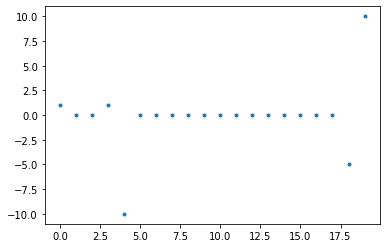

In [59]:
from scipy.fftpack import rfft, irfft
N=20
L=10
dx=L/N
x = linspace(0.0,L-dx,N)
#x = linspace(dx/2,L-dx/2,N)
U=1/N+2/N*cos(2*pi*2*x/L)+1*sin(2*pi*2*x/L)+0.5*sin(2*pi*(N/2-1)*x/L)\
+0.5*cos(2*pi*(N/2)*x/L)
plot(arange(0,N),rfft(U),'.');
print('Fourier inverse de fourier=identité (erreur machine près):',\
      max(abs(irfft(rfft(U))-U)))
print(rfft(U))

## Transformée rapide en cosinus

Pour choisir une base de fonction réelle satisfaisant une dérivée nulle aux extrémités, une base en cosinus est adaptée. On remarque que la grille de pas $dx$ est placée au milieu des segments $N$ segments de longueur $dx$ qui couvrent l'intervalle $[0,L]$. Ansi on évalue la fonction en $\frac {dx} 2$ puis par pas de $dx$  avant d'en calculer la transformée de Fourier "dct". La base construite est $\phi_0=\frac 1 {2N}$, $\phi_1(x)=\frac 1 {N} \cos(\pi\frac x L)$, $\phi_2(x)=\frac 1 {N} \cos(\pi 2\frac x L)$, $\cdots$, $\phi_{N-2}(x)=\frac 1 {N} \cos(\pi(N-2)\frac x L)$, $\phi_{N-1}(x)=\frac 1 {N} \cos(\pi(N-1)\frac x L)$.

Contrairement à la fonction "irfft" qui est bien la transformée inverse de la fonction "rfft", la fonction "idct" doit être renormalisée par $\frac 1 {2N}$.

Fourier inverse de fourier=identité 6.661338147750939e-16
-2.1649348980190553e-15


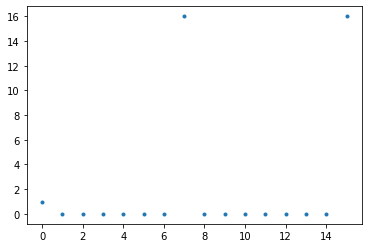

In [60]:
from scipy.fftpack import dct, idct
N=2**4
L=10
dx=L/N
x = linspace(dx/2,L-dx/2,N)
#x = linspace(0,L-dx,N) # décalage de grille inadapté
U=1/(2*N)+1*cos(pi*7*x/L)+1*cos(pi*(N-1)*x/L)
plot(arange(0,N),dct(U,2),'.');
print('Fourier inverse de fourier=identité',max(abs(0.5/N*idct(dct(U))-U)))
print(cos(pi*1*x/L)@cos(pi*3*x/L))

## Transformée rapide en sinus

Pour choisir une base de fonction réelle satisfaisant une condition de Dirichlet homogène aux extrémités, une base en sinus est adaptée. On remarque que la grille de pas $dx$ est placée au milieu des segments $N$ segments de longueur $dx$ qui couvrent l'intervalle $[0,L]$. Ansi on évalue la fonction en $\frac {dx} 2$ puis par pas de $dx$  avant d'en calculer la transformée de Fourier "dst". La base construite est $\phi_0=\frac 1 {N} \sin(\pi\frac x L)$, $\phi_1(x)=\frac 1 {N} \sin(\pi 2\frac x L)$, $\phi_2(x)=\frac 1 {N} \sin(\pi 3\frac x L)$, $\cdots$, $\phi_{N-2}(x)=\frac 1 {N} \sin(\pi(N-1)\frac x L)$, $\phi_{N-1}(x)=\frac 1 {2N} \sin(\pi N\frac x L)$.

Fourier inverse de fourier=identité 8.881784197001252e-16


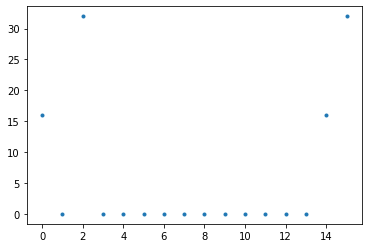

In [61]:
from scipy.fftpack import dst, idst
N=2**4
L=10
dx=L/N
x = linspace(dx/2,L-dx/2,N)
U=1*sin(pi*1*x/L)+2*sin(pi*3*x/L)+1*sin(pi*(N-1)*x/L)+1*sin(pi*(N)*x/L)
plot(arange(0,N),dst(U),'.');
print('Fourier inverse de fourier=identité',max(abs(0.5/N*idst(dst(U))-U)))

### Représentation de l'interpolation de Fourier
Les coefficients de Fourier sont les coefficents dans la base des fonctions trigonométriques pour interpoler les valeurs de la fonction sur la grille régulière. 
En choisissant une interpolation à $N=16$ points, pour interpoler la fonction discontinue nulle sur la moitié du domaine et constante égale à $1$ sur l'autre moitié, on va observer la qualité de l'interpolation entre les points de grille pour dans cette situation peu avantageuse où l'on cherche à approcher une fonction discontinue par des fonctions continues. On va choisir la base des fonctions cosinus qui satisfont des conditions limites de Neumann.

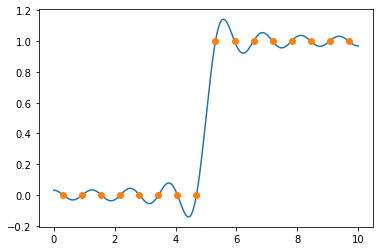

In [83]:
from matplotlib.pylab import *
from scipy.fftpack import dct
N=16
L=10
dx=L/N
x = linspace(dx/2,L-dx/2,N)
U=zeros(N)
U[int(N/2):]=1
Uchap=dct(U)
xfin=linspace(0,L,1000)
Ufin=Uchap[0]*ones(1000)/(2*N)
for k in range(1,N):
    Ufin+=Uchap[k]/N*cos(pi*k*xfin/L)
plot(xfin,Ufin)
plot(x,U,'o')

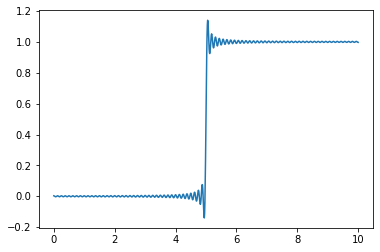

In [87]:
N=160
L=10
dx=L/N
x = linspace(dx/2,L-dx/2,N)
U=zeros(N)
U[int(N/2):]=1
Uchap=dct(U)
xfin=linspace(0,L,1000)
Ufin=Uchap[0]*ones(1000)/(2*N)
for k in range(1,N):
    Ufin+=Uchap[k]/N*cos(pi*k*xfin/L)
plot(xfin,Ufin)


On observe les oscillations de Gibbs qui sont dues à la discontinuité de la fonction à interpoler. Pour une fonction plus régulière, on  observera une interpolation de meilleure qualité.
Soit $f(x)=\tanh(\frac {20} L(x-\frac L 2))$ pour $x\in[0,L]$. On va observer l'interpolation de Fourier de cette fonction avec $N=16$ points. 

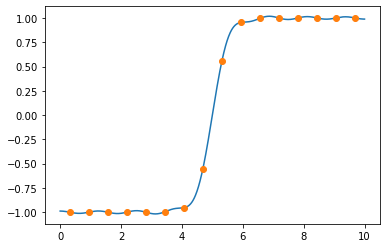

In [102]:
N=16
L=10
dx=L/N
x = linspace(dx/2,L-dx/2,N)
U=tanh(20/L*(x-L/2))    
Uchap=dct(U)
xfin=linspace(0,L,1000)
Ufin=Uchap[0]*ones(1000)/(2*N)
for k in range(1,N):
    Ufin+=Uchap[k]/N*cos(pi*k*xfin/L)
plot(xfin,Ufin)
plot(x,U,'o')

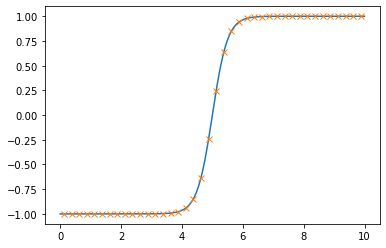

In [105]:
N=40
L=10
dx=L/N
x = linspace(dx/2,L-dx/2,N)
U=tanh(20/L*(x-L/2))    
Uchap=dct(U)
xfin=linspace(0,L,1000)
Ufin=Uchap[0]*ones(1000)/(2*N)
for k in range(1,N):
    Ufin+=Uchap[k]/N*cos(pi*k*xfin/L)
plot(xfin,Ufin)
plot(x,U,'x')

### Vérification de l'orthogonalité des bases
#### Orthogonalité des bases trigonométriques
On vérifie que les bases trigonométriques sont bien orthogonales. Pour cela, on calcule les produits scalaires des fonctions de base entre elles. On vérifie que les produits scalaires sont nuls sauf pour les fonctions de base associées à un même indice. Le produit scalaire de deux fonctions $f$ et $g$ définies sur $[0,L]$ à valeur réelle est donné par $\int_0^L f(x)g(x)\,dx$.

On teste ici l'orthogonalité des bases trigonométriques pour les fonctions trigonométriques réelles en cosinus satisfaisant des conditions limites de Neumann, $\phi_0=1$, $\phi_1(x)= \cos(\pi\frac x L)$, $\phi_2(x)=\cos(\pi 2\frac x L)$, $\cdots$, $\phi_{N-2}(x)= \cos(\pi(N-2)\frac x L)$, $\phi_{N-1}(x)= \cos(\pi(N-1)\frac x L)$.


In [62]:
# test sur un exemple
import sympy as sy
x,L=sy.symbols('x, L',real=True, positive=True)
phi1=sy.cos(sy.pi*x/L)

for k in range(0,6):
    phi=sy.cos(sy.pi*k*x/L)
    display(sy.integrate(phi1*phi,(x,0,L)))


0

L/2

0

0

0

0

On poursuit ce test pour vérifier l'orthogonalité discrète dans $\mathbb R^N$ pour les évaluations des fonctions de base sur une subdivision. On vérifie que le produits scalaire de $\mathbb R^N$ associé à la formule de quadrature du point milieu (pour chacun de $N$ intrvalles de subdivision) possède la même propriété d'orthogonalité. La formule de quadrature sous-jacente est
$$
\int_0^L f(x)\,dx\sim \frac L N \sum_{k=0}^{N-1} f(x_k),
$$
avec $x_k=\frac {L}{2N}+k\frac L N$.

In [63]:
import sympy as sy
N,k=sy.symbols('N, k',integer=True, positive=True)
L=sy.symbols('L',positive=True)
N=5
xk=L/(2*N)+k*L/N # FQ milieu
xkk=k*L/N #FQ gauche
phi1k=sy.cos(sy.pi*xk/L)
phi1kk=sy.cos(sy.pi*xkk/L)
for l in range(0,N):
        philk=sy.cos(l*sy.pi*xk/L)
        display(sy.N(sy.simplify(sy.Sum(phi1k*philk,(k,0,N-1)))))
print(' ')
for l in range(0,N):
        philkk=sy.cos(l*sy.pi*xkk/L)
        display(sy.N(sy.simplify(sy.Sum(phi1kk*philkk,(k,0,N-1)))))


0

2.50000000000000

0

0

0

1.00000000000000

2.50000000000000

1.00000000000000

0.e-125

1.00000000000000

### Exercices
- Produire le calcul d'orthogonalité pour les bases trigonométriques en sinus, pour le produit scalaire de $L^2(0,L)$ 
- Produire le calcul d'orthogonalité pour les bases trigonométriques en cosinus, pour le produit scalaire discret de $\mathbb R^N$ associé à la formule de quadrature du point milieu.
- Produire le calcul d'orthogonalité pour les bases trigonométriques réelle satisfaisant la propriété de périodicité sur $(0,L)$, pour le produit scalaire de $L^2(0,L)$ 
- Produire le calcul d'orthogonalité pour la même base en discret, pour le produit scalaire discret de $\mathbb R^N$ associé à la formule de quadrature du rectangle à gauche pour une subdivision à $N$ intervalles de $(0,L)$.

## Résolution du problème de Neumann homogène
L'exemple qui suit compare la solution analytique à la solution obtenue par méthode spectrale en exploitant les bases orthogonales identifiées. On rappelle que la fonction "idct" n'est pas exactement la transformée de Fourier inverse. Elle a besoin d'être normalisée avec le facteur $\frac 1{2N}$.

1.7763568394002505e-15
simu time 0.0007691383361816406
30 0.000475198016141154


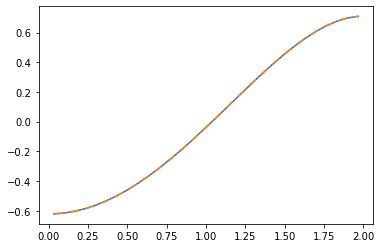

In [64]:
from scipy.fftpack import dct, idct
import time
N=30
L=2
dx=L/N
x = linspace(dx/2,L-dx/2,N)
print(cos(pi*9*x/L)@cos(pi*14*x/L))#verification orthogonalité
f=x**2#-4/3.#ones(N)#sin(pi*1.5*x/L)
#f[0:int(5*N/6)]=0.
#f=2*ones(N)
#f[0:int(N/2)]=0.
f=f-f@ones(N)/N
#f[0:int(N/10)]=0
#f[-1-int(N/10):-1]=0
start = time.time()
fchapeau=dct(f)
Uchapeau=fchapeau # pour avoir un tableau de taille N
Uchapeau[1:]=fchapeau[1:]/(pi*arange(1,N)/L)**2
U=0.5*idct(Uchapeau)/N # fourier inverse
print('simu time',time.time()-start)
plot(x,U);
uex=-x**4/12+4/3.*x**2/2
uex=uex-uex@ones(N)/N
plot(x,uex,'-.')
print(N,max(abs(uex-U)))

#### Exercice
Proposer une méthode de validation de la solution obtenue par méthode spectrale pour le problème de Neumann homogène 1D. On pourra étudier l'erreur en norme $L^2$ pour différentes tailles de grille. Donner l'ordre de convergence de la méthode.

## Extension en dimension 2

La transformée de Fourier discrète se définit en toute dimension. On présentera les calculs similaires au 1D en dimension 2 en étendant le calcul discret aux matrices de taille $N_0,N_1$ avec $\omega_m=j_m k_m /N_m$ ($m=0,1$):
\begin{split}\hat{u}_{k_0,k_1} &= \frac{1}{N_0}\sum_{j_0 \in \textbf{j}_0}\Big( e^{-2\pi i \omega_0} \frac{1}{N_1} \sum_{j_1\in \textbf{j}_1} \Big( e^{-2\pi i \omega_1} u_{j_0,j_1}\Big) \Big), \quad \forall \, (k_0, k_1) \in \textbf{I}_0  \times \textbf{I}_1, \\
u_{j_0, j_1} &= \sum_{k_1\in \textbf{k}_1} \Big( e^{2\pi i \omega_1} \sum_{k_0\in\textbf{k}_0} \Big(  e^{2\pi i \omega_0} \hat{u}_{k_0, k_1} \Big) \Big), \quad \forall \, (j_0, j_1) \in \textbf{I}_0 \times \textbf{I}_1,\end{split}
avec, comme un 1D, $\textbf{I}_m=\{0, 1, \ldots, N_m-1\}$.

On va comparer le calcul d'un problème de Neumann homogène calculé par transformée de Fourier rapide à l'aide de la généralisation de la fonction "dct" à "dctn" quelle que soit le nombre d'indices du tableau en argument (ici 2). On verra que le temps de calcul est drastiquement réduit par cette méthode comparée à une méthode différence finie qui aboutit à un système creux résolu par factorisation $LU$ (méthode de Gauss) ou par méthode itérative (gradient conjugué...). Le ratio de temps est de plusieurs centaine pour $10^6$ inconnues. Seul les méthodes de résolution multigrilles pour les systèmes creux peuvent tenter de rivaliser.

In [65]:
from IPython.display import display, Latex
from IPython.core.display import HTML
%reset -f
%matplotlib inline
%autosave 300
from matplotlib.pylab import *
from scipy.sparse import spdiags
from scipy.sparse.linalg import spsolve
from scipy.fftpack import dctn, idctn
#La matrice du système par volume fini
def Laplace(N,M,l,h):
    D0=(2/(l**2)+2/(h**2))*ones(N*M)# diagonale principale
    D1=-1/l**2*ones(N*M)# surdiagonale
    D1[N::N]=0.#correction de la surdiagonale (voisin de droite n existe pas au bord droit)
    D0[0::N]-=1/l**2
    D0[N-1::N]-=1/l**2
    DM1=-1/l**2*ones(N*M)# sousdiagonale
    DM1[N-1::N]=0.#correction de la sousdiagonale (voisin de gauche n existe pas au bord gauche)
    DN=-1/h**2*ones(N*M)
    D0[0:N]-=1/h**2
    D0[N*(M-1):]-=1/h**2
    A=spdiags(D0,[0],N*M,N*M)+spdiags(D1,[1],N*M,N*M)+spdiags(DM1,[-1],N*M,N*M)
    A=A+spdiags(DN,[N],N*M,N*M)+spdiags(DN,[-N],N*M,N*M)
    return A

N=1000
M=1200
L=2
H=2
dx=L/N
dy=H/M
LAP=Laplace(N,M,dx,dy)
x = linspace(dx/2,L-dx/2,N)
y = linspace(dy/2,H-dy/2,M)
X, Y = meshgrid(x,y)
f=(X-0.5*L)**2+(Y-0.5*H)**2
#f=(4*pi**2/L**2+9*pi**2/H**2)*cos(2*pi*X/L)*cos(3*pi*Y/H)
f=f-reshape(f,N*M)@ones(N*M)/(N*M)
start=time.time()
U=dctn(f)
Ti,Tj=meshgrid(range(N),range(M))
Ti[0,0]=1.
Tj[0,0]=1.
U=U/(pi**2*Ti**2/L**2+pi**2*Tj**2/H**2)
U=0.25*idctn(U)/(N*M)
#U=U/sqrt(2)
print('grille',N,M,'temps simu fft',time.time()-start)
start=time.time()
U_DF=spsolve(LAP,reshape(f,N*M))
U_DF-=U_DF@ones(N*M)/(N*M)
print('grille',N,M,'temps simu difference finie',time.time()-start)
err=reshape(U,N*M)-U_DF
print('l écart entre les 2 méthodes de résolution produit une différence relative de',max(abs(err))/max(abs(U_DF)))
U_DF=reshape(U_DF,(M,N))

Autosaving every 300 seconds
grille 1000 1200 temps simu fft 0.06723284721374512
grille 1000 1200 temps simu difference finie 25.22496795654297
l écart entre les 2 méthodes de résolution produit une différence relative de 4.2257088538576055e-06


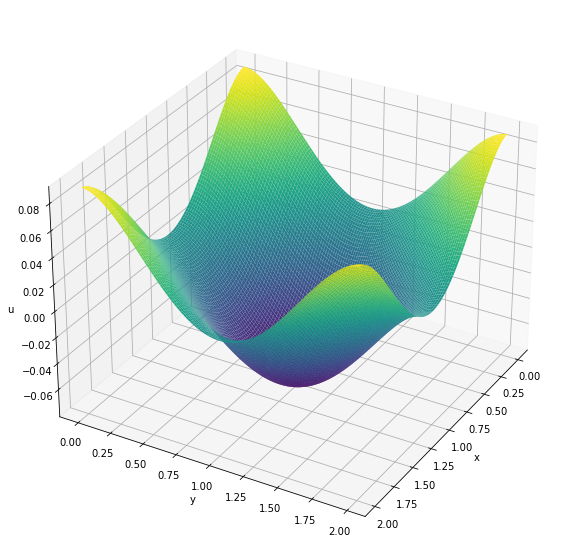

In [66]:
from mpl_toolkits import mplot3d
figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax = plt.axes(projection='3d')
ax.plot_surface(X[::10,::10], Y[::10,::10], U[::10,::10], rstride=1, cstride=1,
                cmap='viridis', edgecolor='none');

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u');
ax.view_init(30, 30)

### Résolution d'un problème de Poisson 3D

On observe ici l'extension 3D du problème de Neumann homogène sur un cube pour s'apercevoir que ce problème 3D est accessible au calcul séquentiel sur grille fine (par exemple $10^8$ inconnues). Avec quelques millions d'inconnues, la résolution est largement sous la seconde.
#### Exercice
On propose de résoudre un problème de Dirichlet homogène en 3D pour vérifier la méthode de résolution. On testera la convergence de la méthode en fonction de la taille de la grille.

In [67]:
from scipy.fftpack import dctn, idctn
N=200
M=100
K=200
L=10.
H=8.
P=7.
dx=L/N
dy=H/M
dz=P/K
x = linspace(dx/2,L-dx/2,N)
y = linspace(dy/2,H-dy/2,M)
z = linspace(dz/2,P-dz/2,K)
X, Y, Z = meshgrid(x,y,z)
f=cos(1*pi*X/L)*cos(pi*Y/L)**2*sin(pi*Z/P)
f=f-reshape(f,N*M*K)@ones(N*M*K)/(N*M*K)
Ti,Tj,Tk=meshgrid(range(N),range(M),range(K))
Ti[0,0,0]=1.
Tj[0,0,0]=1.
Tk[0,0,0]=1.
start=time.time()
U=dctn(f)
U=U/(pi**2*Ti**2/L**2+pi**2*Tj**2/H**2+pi**2*Tk**2/P**2)
U=0.125*idctn(U)/(N*M*K)
print('grille',N,M,K,'temps simu',time.time()-start)

grille 200 100 200 temps simu 0.24617290496826172


# Equation de la chaleur instationnaire
On va étudier la manière d'approcher l'équation de la chaleur. Celle-ci décrit les phénomènes transitoires (instationnaires) en temps d'un phénomène de diffusion.

On introduit d'abord un problème elliptique qui décrit le phénomène de diffusion stationnaire. On reprend le problème de Dirichlet étudié précédemment:
$$
\begin{align}
&-u_l''(x)=f(x),\quad \forall x\in ]0,L[,\\
&u_l(0)=u_l(L)=0.
\end {align}
$$
Le modèle parabolique décrit par l'équation de la chaleur s'écrit,
$$
\begin{align}
&\partial_t u(t,x)-\partial_{xx}u(t,x)=f(t,x),\quad \forall x\in ]0,L[, t>0\\
&u(0,x)=u_0(x),~\forall x\in ]0,L[,\\
&u(t,0)=u(t,L)=0,~\forall t>0.
\end {align}
$$
où l'inconnue $u$ (la température) dépend du temps $t$ et de la position $x$. On a introduit une source de chaleur $f$ qui peut varier au cours du temps et une condition initiale $u_0$ où la température est connue partout en espace à un instant donnée. C'est une équation d'évolution, si on connaît la solution à un instant initial l'équation permet de prédire le future de la température en tout point de l'espace.
## Un problème de Cauchy et aux limites
Ce problème mélange problème aux limites (ici problème de Dirichlet dans la variable $x$) et problème de Cauchy (évolution en $t$ depuis la donnée de Cauchy en $t=0$).
On ne cherchera pas à résoudre ce problème en temps négatif car il est mal posé en temps rétrograde. On donnera une explication de cette impossibilité lorsqu'on résoudra le problème en Fourier spatial.

On peut approcher ce problème par différence finie en espace pour trouver un problème de Cauchy dans $\mathbb R^N$ en temps du type: ($U(t)\in \mathbb R^N$)
$$
\begin{align}
&\partial_t U(t)+AU(t)=F(t),\quad \forall t>0,\\
&U(0)=U_0\in \mathbb R^N,
\end {align}
$$
où $A$ est la matrice tridiagonale associée à $-\partial_{xx}$ et $F_i(t)=f(t,x_i)$.
Compte tenu de la taille de $N$, on renoncera à expliciter l'exponentielle de matrice (cf début de ce cours) pour résoudre ce problème. On se tournerait vers une méthode d'approximation type Euler explicite ou implicite. On peut aussi se tourner vers une méthode spectrale en espace pour résoudre ce problème. On va s'intéresser à cette dernière méthode.

## Méthode spectrale en espace

On note $\textbf{x}=\frac h 2 (0, h, \ldots, (N-1)h)$ avec $h=\frac L N$. On note $\phi_k$ ($0\le k<N$) les fonctions trigonométriques en sinus, satisfaisant les conditions limites de Dirichlet homogène:
$$ \phi_k(x)=\sin({\pi  (k+1)\frac x L}),~x\in[0,L[.$$
On reécrit la transformée de Fourier discrète pour $\textbf{u}(t)=u(t,\textbf{x})$ (au sens de Hadamard) et on a 
$$
\textbf{u}(t)=u(t,\textbf{x})=\sum_{k=0}^{N-1}\hat{\textbf{u}}_k(t)  \phi_k(\textbf{x}).
$$
Si de plus $u_0\in Vect(\phi_k, ~0\le k<N)$ alors $u(t,.)=\sum_{k=0}^{N-1}\hat{\textbf{u}}_k (t) \phi_k$.
L'équation vérifiée par $\hat{\textbf{u}}_k$ est donnée par:
$$
\partial_t \hat{\textbf{u}}_k(t)=-\pi^2 (k+1)^2 \hat{\textbf{u}}_k(t)+\hat{f}_k(t),
$$
pour tout $k\in \textbf{k}=0, 1, \ldots, N-1$.
On est ainsi ramené à la résolution de $N$ équations différentielles ordinaires linéaires scalaires découplées. On sait résoudre explicitement et de façon exacte ses équations.

La solution du problème sans terme source ($f=0$) est donnée par:
$$
\hat{\textbf{u}}_k(t)=\hat{\textbf{u}}_k(0)e^{-\pi^2 (k+1)^2 t}.
$$
On peut alors calculer pour nimporte quel temps $t$ la solution en espace en sommant les contributions de chaque mode de Fourier. Le code se présente ainsi:



N= 1000


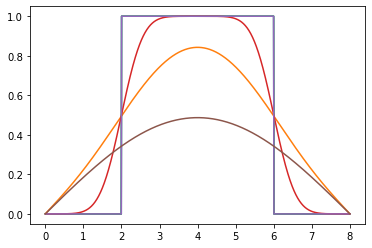

In [68]:
from scipy.fftpack import dst, idst
L = 8        
N = 1000
print('N=',N)
dx = L/(N)            # intervalle temporel entre deux points
T=1
U=zeros(N)
U[int(N/4):int(3*N/4)]=1

x = linspace(dx/2,L-dx/2,N)
lamb=(pi*arange(1,N+1)/L)**2
tfd0=dst(U)
uchapeauT=tfd0*exp(-lamb*T)
uT=0.5*idst(uchapeauT)/N
plot(x,U,x,uT)

T=0.1
uchapeauT=tfd0*exp(-lamb*T)
uT=0.5*idst(uchapeauT)/N
plot(x,U,x,uT)
T=4
uchapeauT=tfd0*exp(-lamb*T)
uT=0.5*idst(uchapeauT)/N
plot(x,U,x,uT)

Avec des conditions limites périodiques, on construit le code de la même manière en prenant soin de bien évaluer la dérivée seconde de chaque fonction de base pour trouver $\lambda_k$ ($\lambda_k=(2*pi*kk/L)^2$ dans le code) tel que 
$$
-\partial_x^2\phi_k=\lambda_k \phi_k.
$$ 
On calcule ici la solution en se basant sur la formule de Duhamel à l'instant $t+dt$ en fonction de la solution à l'instant $t$. On aurait pu faire les calculs à chaque pas de temps en se basant sur la donnée de Cauchy en $t=0$ plutôt que $t$, mais cette approche anticipe la gestion d'un terme source.
$$
\hat{\textbf{u}}_k(t+dt)=\hat{\textbf{u}}_k(t)e^{-\lambda_k dt}.
$$

N= 4096
3.2
elapsed_time = 0.035414934158325195


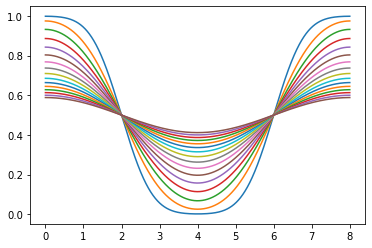

In [69]:
from scipy.fftpack import rfft, irfft
L = 8        
N = 2**12
print('N=',N)
dx = L/(N)            # intervalle temporel entre deux points
dt=0.2
U=ones(N)
U[int(N/4):int(3*N/4)]=0
U0=U
x = linspace(0.0,L-dx,N)
tfd=rfft(U)
start = time.time()
#boucle en temps
kk=zeros(N)
kk[1::2]=range(1,int(N/2)+1)
kk[0::2]=range(0,int(N/2))
for n in range(int(3/dt)+1):
    t=(n+1)*dt#
    tfd=exp(-dt*(2*pi*kk/L)**2)*tfd
    U=irfft(tfd)
    plot(x,U);
print(t)
print("elapsed_time =", time.time() - start) 

#### Exercice
Faire le même code en changeant la condition limite périodique en condition de Neumann.
### Prise en compte du terme source
L'objectif est maintenant de tenir compte du terme source. On a transformé l'équation de la chaleur
$$
\partial_t u(t,x)-\partial_x^2u(t,x)=f(t,x),~\forall x\in ]0,L[, t>0,
$$
pour une certaine condition au limite homogène (Dirichlet, Neumann, ou périodique), en un problème approché, écrit pour chaque composante d'une base en Fourier, sous la forme
$$
\partial_t \hat{\textbf{u}}_k(t)+\lambda_k\hat{\textbf{u}}_k(t)=\hat{f}_k(t),
$$
où $\lambda_k$ dépend de la condition limite choisie.

On applique la formule de Duhamel entre les instants $t+dt$ et $t$ où $dt>0$:
$$
\hat{\textbf{u}}_k(t+dt)=\hat{\textbf{u}}_k(t)e^{-\lambda_k dt}+\int_t^{t+dt} e^{-\lambda_k (t+dt-s)}\hat{f}_k(s)\,ds.
$$
On appliquera cette formule pour $t=0$ puis $t=dt,2dt,3dt,\cdots$.  
La contribution du terme source sera évaluée par une formule de quadrature (approximation de l'intégrale) et sa précision repose sur la petitesse de $dt$. On prendra par exemple la formule de quadrature du point milieu:
$$
\int_t^{t+dt} e^{-\lambda_k (t+dt-s)}\hat{f}_k(s)\,ds\sim dt e^{-\lambda_k (\frac {dt} 2)}\hat{f}_k(t+\frac {dt} 2).
$$
On reprend ainsi le code résolvant l'équation de la chaleur avec des conditions limites périodiques an ajoutant le terme 
$$
f(x)=\begin{cases}1 \text{ si }x\in ]\frac L 2,\frac {5L}8[\\
0 \text{ sinon.} 
\end {cases}
$$





N= 1000
5.050000000000001
elapsed_time = 0.1169281005859375


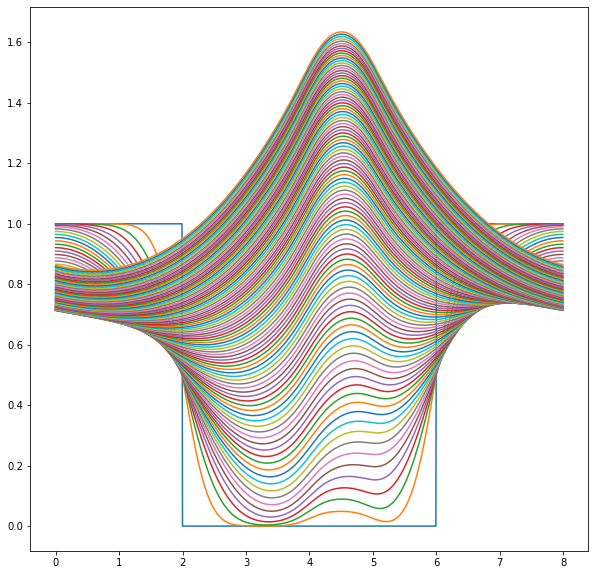

In [71]:
from scipy.fftpack import rfft, irfft
L = 8        
N = 1000
print('N=',N)
dx = L/(N)            # intervalle temporel entre deux points
dt=0.05
U=ones(N)
U[int(N/4):int(3*N/4)]=0
F=zeros(N)
F[int(N/2):int(5*N/8)]=1
x = linspace(0.0,L-dx,N)
Fchap=rfft(F)
Uchap=rfft(U)
start = time.time()
#boucle en temps
kk=zeros(N)
kk[1::2]=range(1,int(N/2)+1)
kk[0::2]=range(0,int(N/2))
figure(figsize=(10,10))
plot(x,U);
for n in range(int(5/dt)+1):
    t=(n+1)*dt#
    Uchap=exp(-dt*(2*pi*kk/L)**2)*Uchap+dt*exp(-0.5*dt*(2*pi*kk/L)**2)*Fchap
    U=irfft(Uchap)
    plot(x,U);
print(t)
print("elapsed_time =", time.time() - start) 

#### Exercice
- Pourquoi la solution semble trouver un profil stabilisé en temps grand qui se translate verticalement? (Indication: on calculera la dérivée en temps de l'intégrale de la solution au cours du temps).
- Coder le même problème avec un terme source de moyenne nulle, qui se déplace en temps:
$$
f(t,x)=\begin{cases}8 \text{ si }(x-3t\mod L)\in ]\frac L 2,\frac {5L}8[\\
-1 \text{ sinon.} 
\end {cases}
$$
- Etendre ce travail en dimension 2 d'espace pour des conditions périodiques et de Neumann. On choisira un terme source d'abord indépendant de $t$ qui apporte 2 niveaux de dépôt de chaleur différent, l'une sur un sous-domaine réctangulaire, l'autre sur le complémentaire du domaine spatiale.

### Prise en compte d'un terme source dépendant de la solution
Pour motiver ce problème, on peut par exemple décrire un terme source de chaleur résultant d'une combustion qui dépend fortement de la température $u(t,x)$ mais aussi de $x$ (présence de combustible où non).
$$
\partial_t u(t,x)-\partial_x^2u(t,x)=f(u(t,x),x),~\forall x\in ]0,L[, t>0,
$$
pour une certaine condition au limite homogène (Neumann ou périodique) et une donnée initiale strictement positive.
On pourra choisir, 
$$
f(u,x)=\begin{cases}
10 \exp(\frac{-1}{u})\text{ si } x \in ]\frac L 2,\frac {5L} {8}[
    \\
0 \text{ sinon.} 
\end {cases}
$$
En appliquant toujours la formuel de Duhamel, on a 
$$
\hat{\textbf{u}}_k(t+dt)=\hat{\textbf{u}}_k(t)e^{-\lambda_k dt}+\int_t^{t+dt} e^{-\lambda_k (t+dt-s)}\widehat{f(u(s,.),.)}_k(s)\,ds.
$$
On constate qu'on n'est pas en mesure de calculer la transformée de Fourier discrète de $x\to f(u(s,x),x)$ sauf pour $s=t$ où $u(t,.)$ est connu. On choisit, pour faire simplement, la formule de quadrature du rectangle à gauche. On propose l'approximation
$$
\hat{\textbf{u}}_k(t+dt)=\hat{\textbf{u}}_k(t)e^{-\lambda_k dt}+dt e^{-\lambda_k (t+dt)}\widehat{f(u(t,.),.)}_k.
$$
#### Exercice
Coder la résolution de ce problème pour l'approximation proposée.


#### Splitting: une autre approche
Pour résoudre le problème où on doit gérer un terme de diffusion et un terme dit réactif (ou de combustion ici), on peut proposer de séparer les deux phénomènes sur une itération en temps de petit pas de temps $dt$.

On peut choisir de résoudre
$$
\partial_t u(t,x)-\partial_x^2u(t,x)=0,~\forall x\in ]0,L[, t>0,
$$
entre les instants $t$ et $t+dt$ puis repartir de la solution obtenue comme donnée initiale du problème de réaction résolu sur un pas de temps $dt$:
$$
\partial_t u(t,x)=f(u(t,x),x),~\forall x\in ]0,L[, t>0.
$$
Cette deuxième équation peut se résoudre avec différentes méthodes d'approximation et utiliser un outil de résolution d'équation differentielle ordinaire où $x$ (pour chacun des points de discrétisation spatiale) joue le rôle d'un paramètre. 

On dit qu'on a "splitter" ou découpler l'équation aux dérivées partielles, où chaque phénomène a été pris en compte sur une durée de pas de temps $dt$ sur une résolution séparée.

Il est possible, pour gagner en précision, d'appliquer le splitting de Strang, qui consiste à résoudre une partie de l'équation sur un demi pas de temps $\frac {dt} 2$, l'autre partie de l'équation sur un pas de temps $dt$, puis à nouveau la première partie de l'équation sur un demi pas de temps $\frac {dt} 2$. La solution obtenue correspondra à une résolution sur un pas de temps $dt$ du problème complet. L'erreur dûe au splitting sera alors d'ordre 2 au lieu d'ordre 1 pour le premier splitting introduit.

#### Exercice
Coder le splitting de Strang en resolvant la partie réactive avec la formule de quadrature centrée (d'ordre 2).



### Système couplé de réaction-diffusion
Pour augmenter un peu la complexité du problème et se rapprocher des modèles représentant les situations de la vraie vie, on est amené à coupler plusieurs équations de type réaction-diffusion. On pense en particulier au cas où plusieurs espèces chimiques, représentées par leur concentration, diffuse en espace (hétérogénéité des concentrations de chaque espèce chimique) et réagissent entre elles. Les espèces se combinant pour en former des nouvelles. Un exemple à deux espèces de concentration $u$ et $v$ s'écrit:
$$
\begin{cases}
\partial_t u(t,x)-d_u\Delta u(t,x)=f(u(t,x),v(t,x)),~\forall x\in \Omega, t>0,\\
\partial_t v(t,x)-d_v\Delta v(t,x)=g(u(t,x),v(t,x)),~\forall x\in \Omega, t>0,\\
u(0,x)=u_0(x)~\forall x\in \Omega\\
v(0,x)=v_0(x)~\forall x\in \Omega\\
\partial_n u_{|\partial \Omega}=\partial_n v_{|\partial \Omega}=0,
\end {cases}
$$
où $\Omega$ est le domaine spatial cartésien en dimension 1,2 ou 3. Les conditions de Neumann homogènes traduisent ici que les espèces chimiques ne peuvent traverser le bord du domaine (étanche).

Par une technique de splitting, il est simplement nécessaire de savoir résoudre chacun des problèmes suivants séparemment puis d'alterner leurs résolutions.
$$
\begin{cases}
\partial_t u(t,x)-d_u\Delta u(t,x)=0,~\forall x\in \Omega, t>0,\\
\partial_t v(t,x)-d_v\Delta v(t,x)=0,~\forall x\in \Omega, t>0,\\
\partial_n u_{|\partial \Omega}=\partial_n v_{|\partial \Omega}=0,
\end {cases}
$$
$$
\begin{cases}
\partial_t u(t,x)=f(u(t,x),v(t,x)),~\forall x\in \Omega, t>0,\\
\partial_t v(t,x)=g(u(t,x),v(t,x)),~\forall x\in \Omega, t>0.\\
\end {cases}
$$
#### Exercice
Coder la résolution de ce problème en dimension 2 avec des conditions de Neumann homogènes. Pour l'équation de l'orégonateur, on choisira par exemple $f(u,v)=\alpha u-\beta uv$ et $g(u,v)=\beta uv-\gamma v$ avec $\alpha=0.1$, $\beta=0.02$ et $\gamma=0.3$.


## Approximation par Différences finies en espace
On peut aussi approcher l'équation de la chaleur par différences finies en espace. En reprenant l'approximation de la dérivée seconde en espace par différences finies centrées et en notant $A$ la matrice tridiagonale associée, l'équation de la chaleur 
$$
\begin{align}
&\partial_t u(t,x)-\partial_{xx}u(t,x)=f(t,x),\quad \forall x\in ]0,L[, t>0\\
&u(0,x)=u_0(x),~\forall x\in ]0,L[,\\
&u(t,0)=u(t,L)=0,~\forall t>0,
\end {align}
$$
est approchée par le système linéaire d'équations différentielles ordinaires,
$$
\begin{align}
&\partial_t U(t)+AU(t)=F(t),\quad \forall t>0,\\
&U(0)=U_0\in \mathbb R^N.
\end {align}
$$
La formule de Duhamel permet en théorie de donner la solution,
$$
U(t+dt)=e^{-dtA}U(t)+\int_t^{t+dt} e^{-(t-s)A}F(s)\,ds.
$$
Il est illusoire de calculer l'exponentielle de matrice pour une matrice de taille $N$ grande. On se tournera vers une méthode d'approximation de l'exponentielle de matrice. On se tournera vers une méthode d'approximation de l'intégrale pour calculer la solution.
Approcher $e^{-tA}$ par $I-tA$ est une méthode d'ordre 1 en $t$. C'est en fait le schéma d'Euler explicite. En effet, prenons $F=0$ pour simplifier. On a alors, 
$$
U(t+dt)=U(t)-dtAU(t)=(I-dtA)U(t).
$$
On reconnaît l'approximation par la formule des rectangles à gauche
$$
U(t+dt)=U(t)-\int_t^{t+dt} A U(s)ds\sim U(t)-dtAU(t).
$$
## Euler explicite
L'approximation en temps proposée est le schéma d'Euler explicite.
On a vu que cette méthode d'approximation induit des limitations sur le pas de temps pour garantir la stabilité de la méthode. Dans le cas présent, cette limitation est donnée par le pas de temps critique $\Delta t_c=\frac {h^2}{2}$ où $h$ est le pas de discrétisation en espace. Cette limitation est très restrictive compte tenu de la borne quadratique en $h$ pour $dt$. Ce schéma d'Euler exlicite s'écrit, en un point $x_i$ de la discrétisation spatiale,
$$
U_i(t+dt)=U_i(t)+\frac {dt}{h^2}(U_{i-1}(t)-2U_i(t)+U_{i+1}(t)).
$$
Soit encore,
$$
U_i(t+dt)=\frac {dt}{h^2}U_{i-1}(t)+(1-2\frac {dt}{h^2})U_i(t)+\frac {dt}{h^2}U_{i+1}(t).
$$
On remarque que $U_i(t+dt)$ est une combinaison convexe de $U_{i-1}(t)$, $U_i(t)$ et $U_{i+1}(t)$ si et seulement si $(1-2\frac {dt}{h^2})\ge 0$ soit $dt\le \frac {h^2} 2$. On a donc retrouvé la borne sur le pas de temps pour garantir la stabilité du schéma d'Euler explicite pour la norme du max.
#### Exercice
Coder ce schéma et observer la condition de stabilité. La donnée initiale sera choisie discontinue pour observer que l'instabilité naît en premier lieu des discontinuités.


### Schéma implicite
Comme on l'a vu au début de ce cours avec le schéma d'Euler implicite, on peut aussi approcher l'exponentielle de matrice par une méthode d'ordre 1 en $t$ mais stable pour tout pas de temps. On a vu que le schéma d'Euler implicite s'écrit, en un point $x_i$ de la discrétisation spatiale,
$$
U_i(t+dt)=U_i(t)+\frac {dt}{h^2}(U_{i-1}(t+dt)-2U_i(t+dt)+U_{i+1}(t+dt)).
$$
Soit encore, sous forme matricielle,
$$
(I+dt A)U(t+dt)=U(t).
$$
Comme le terme de diffusion cache un phénomène d'amortissement (bien visible en Fourier), l'implicitation du schéma va conduire à une suite $(U^n)_n$ bornée avec
$$
U^0=U_0,~U^{n}=U(n dt).
$$
En effet, tout repose sur la propriété de la matrice $A$ qui est définie positive. On peut alors écrire, pour $(.,.)$ le produit scalaire euclidien de $\mathbb R^N$,
$$
(U^{n+1},U^{n+1})+(dt A U^{n+1},U^{n+1})=(U^{n},U^{n+1}),
$$
avec $(AU,U)\ge 0$ pour tout $U\in \mathbb R^N$ puisque $A$ est définie positive. On a donc,
$$
\Vert U^{n+1}\Vert^2\le \Vert U^{n}\Vert^2.
$$
On a bien obtenu, par récurrence que la suite $(U^n)_n$ est bornée inconditionnellement sur le pas de temps. On a donc obtenu la stabilité du schéma d'Euler implicite pour la norme euclidienne.

- Exercice (pour matheux): Montrer que la matrice $A$ satisfait 
$$
(AU,U)\ge 0,~\forall U\in \mathbb R^N,
$$
en remarquant que $A$ est à diagonale dominante.

- Exercice: Coder ce schéma et observer la stabilité de la méthode pour tout pas de temps.

- Exercice: Proposer la formule de quadrature des trapèzes pour approcher l'intégrale de l'équation de la chaleur en temps. Constatez que la méthode est d'ordre 2 en temps, implicite et stable pour tout pas de temps (On prendra le produit scalaire de l'expression du schéma avec $U^{n+1}+U^n$ pour obtenir la propriété de stabilité).

## Equation des ondes
On a vu l'équation de la chaleur résolu exactement en temps à l'aide de l'approximation spatiale en Fourier. On a vu qu'il était possible d'introduire une approximation temporelle pour se donner plus de liberté sur l'approximation spatiale.

Ici, nous allons revenir à l'approximation en espace par Fourier pour exploiter la résolution exacte en temps de l'équation des ondes. 

L'équation des ondes peut décrire la propagation d'un son (ondes acoustiques) ou d'une vibration (ondes dans un matériau solide élastique). 
Elle s'écrit en dimension 1,
$$
\begin{align*}
&\partial_t^2 u(t,x)-\partial_x^2 u(t,x)=f(t,x),\quad \forall x\in ]0,L[, t>0,\\
&u(0,x)=u_0(x),~\forall x\in ]0,L[,\\
&\partial_t u(0,x)=v_0(x),~\forall x\in ]0,L[,\\
&u(t,0)=u(t,L)=0,~\forall t>0.
\end{align*}
$$
On a choisi ici des condition limites de Dirichlet homogène. On peut aussi choisir des conditions limites de Neumann homogène selon le phénomène étudié. On a introduit une donnée initiale $u_0$ et une donnée initiale de vitesse $v_0$ parce que l'équation des ondes est d'ordre 2 en temps, elle fait intervenir une dérivée seconde en temps. On a donc besoin de deux conditions initiales pour résoudre le problème.
### Approximation en espace par Fourier

On va d'abord supposé l'absence de terme source ($f=0$) pour simplifier. On va chercher à résoudre l'équation des ondes en dimension 1 par la méthode de Fourier. On va chercher une solution de l'équation des ondes sous la forme,
$$
u(t,x)=\sum_{k=0}^{N-1}\hat{u}_k(t) \phi_k(x),
$$
où $\phi_k(x)=\sin(\pi (k+1)\frac x L)$ est une fonction de base en sinus satisfaisant les conditions limites de Dirichlet homogène. On a alors, en identifiant le $k$-ième coefficient de Fourier dans l'équation des ondes,
$$
\partial_t^2 \hat{u}_k(t)=-\lambda_k \hat{u}_k(t),
$$
ou $\lambda_k=(\pi (k+1)/L)^2$. 
### Calcul de la solution analytique
On est ramené à résoudre l'équation différentielle ordinaire scalaire du second ordre,
$$
\begin{align*}
&\partial_t^2 \hat{u}_k(t)=-\lambda_k \hat{u}_k(t),\\
&\hat{u}_k(0)=\hat{u_0}_k,\\
&\partial_t \hat{u}_k(0)=\hat{v_0}_k.
\end{align*}
$$
On se ramène à un système d'équation du premier ordre pour exploiter la formule de Duhamel. On a alors,




On a alors pour tout $k\in \textbf{k}=0,1,\ldots,N-1$,
$$
\hat{u}_k(t)=\hat{u}_k(0)\cos(\pi (k+1)\frac t L).
